In [60]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/sig600.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/sig700.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/sig800.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/sig1000.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg.csv"


In [2]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge"]

mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
lumi_sig = [0.083426493, 0.158295474, 0.2864599, 0.498887481, 1.371358358]
lumi_bkg = 1.37029E-06
xsec_sig = [0.0119866, 0.0063173, 0.00349089, 0.00200446, 0.000729204]
xsec_bkg = 729.77
nevents100ifb_sig = [1198.66, 631.73, 349.089, 200.446, 72.9204]
nevents100ifb_bkg = 72977000
normalization_factor_sig = nevents100ifb_sig
normalization_factor_bkg = 72977000*(8025/9999)
#add DR, check lepton pt for bkg

In [3]:
#read signal files
#for sig in sig_file:
    
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [4]:
#tagging signal as 1
for sig in range(len(df_sig)):
    df_sig[sig]["signal"] = 1
print(mass_points[0])
df_sig[0]

500GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,21129.712328,8269.352203,2598.641952,0.697958,1.267961,0.076637,-0.610036,-1.953492,0.931936,113191.871427,1.525909,11,11,11,-1,1,1,1
1,51223.647380,49251.446265,28772.078191,-0.604389,-0.590286,-1.522131,-1.171367,1.263686,1.743165,121224.054033,2.749121,13,13,13,-1,1,-1,1
2,27522.246619,14844.470824,2311.141291,-0.094155,1.257887,-1.108998,2.099139,-1.639181,1.501817,105985.451523,-1.772305,13,13,11,1,-1,1,1
3,39826.765666,15952.419812,15218.825956,0.864823,0.949562,0.020594,-2.339217,-0.678661,-3.136416,115638.399306,-2.166619,11,11,11,1,-1,-1,1
4,73846.081111,25043.146401,12997.545494,-1.128832,-1.061246,2.344771,0.086187,1.205057,0.636635,172669.011572,-2.844790,13,11,13,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,57836.754394,16358.954455,4373.053100,0.482224,0.357346,0.319647,-1.606272,-2.945775,1.896610,109680.134250,-2.011529,11,11,13,1,-1,1,1
9995,82267.948390,13332.932050,13259.130803,0.672945,1.256250,0.674485,1.870266,-1.958347,0.913560,103999.611290,-1.232817,11,11,11,1,1,-1,1
9996,158604.053425,13834.181300,10125.576113,-1.829530,-1.680148,-0.241562,-0.939448,-1.437208,-2.447974,232205.972976,-1.574854,11,11,11,1,-1,1,1
9997,50689.739645,18812.107033,2813.437709,1.897929,1.802774,2.832193,-0.268911,3.018290,1.636812,216233.959987,2.849600,11,11,11,-1,-1,1,1


In [5]:
print(mass_points[1])
df_sig[1]

600GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,40595.999310,39750.354045,15250.675427,1.326112,0.886603,-0.219798,-0.864481,-1.483945,1.297276,201210.741132,1.847213,13,13,11,-1,1,-1,1
1,26979.609328,21809.757625,12355.461617,1.722537,-0.663738,0.486000,-0.059133,2.687881,-2.488549,163594.056266,2.502739,13,11,11,1,1,-1,1
2,110034.655358,11422.031686,10805.727139,-0.373328,1.010955,-0.050813,-1.002898,-1.116272,2.263410,160849.766181,2.754525,13,13,11,1,-1,-1,1
3,48669.005122,17847.509185,8520.265596,1.107274,-0.875573,2.768779,-0.798125,1.162552,-1.943499,62719.377616,1.068376,11,11,11,-1,1,1,1
4,32769.991936,23496.607850,22907.861155,0.752404,0.959222,0.403958,0.224076,-2.233344,2.823286,226188.219646,-1.338330,13,11,11,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,131818.544076,91501.577298,11403.609602,1.023591,-1.175245,2.242850,-2.618297,-0.723319,1.214726,130402.358037,2.065777,11,13,11,1,-1,1,1
9995,132506.654048,17082.925361,3796.076589,-1.402104,-0.581818,-0.937953,-2.684313,0.373465,-2.166674,114975.334022,0.185107,11,11,11,1,1,-1,1
9996,70621.578518,28781.280710,4432.657138,2.203474,1.554724,2.264016,-0.935489,1.135761,2.999228,256875.354657,1.223061,11,11,11,1,1,-1,1
9997,25359.307653,4909.981649,4637.903611,-2.446875,-1.143963,-2.686163,-2.736869,1.565290,1.744242,37761.324796,0.967172,11,11,11,-1,-1,1,1


In [6]:
print(mass_points[2])
df_sig[2]

700GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,59398.268813,52080.897572,24280.246621,1.216915,0.837849,1.068519,1.492895,1.159045,-2.304250,47048.428632,-1.266599,13,13,11,-1,1,1,1
1,52813.199459,41332.383305,15265.190440,1.429294,0.681805,-0.799011,-2.349729,-0.422135,1.552783,376131.857547,1.578773,13,11,11,1,1,-1,1
2,23091.643516,22812.982960,8748.227531,-0.489807,0.090578,0.442374,-1.226065,-2.774989,-2.102864,343732.815318,-2.572086,13,11,13,-1,1,1,1
3,49743.909683,14142.992266,10284.098292,0.038824,1.466416,-0.319358,-2.726589,3.109552,0.466893,85548.325291,0.864717,13,13,11,1,-1,-1,1
4,179337.045385,45000.322643,23388.498310,-0.766250,-1.348609,-0.085868,-0.021289,-1.445225,2.534872,182709.258115,2.515489,11,13,11,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,80447.209516,74078.166217,22090.836406,0.636623,1.028542,1.590562,1.347349,1.085714,-2.619996,79010.004602,-2.721410,13,13,11,-1,1,1,1
9995,109619.111624,16415.076930,11539.213866,0.933246,0.537020,0.529035,1.329526,-0.714104,1.384739,180261.118369,-1.930742,11,13,11,1,1,-1,1
9996,72069.752838,57949.595039,10465.393096,0.444836,0.615894,-0.023391,2.330814,-3.099256,-0.775181,49125.167072,-0.748634,13,13,11,1,-1,1,1
9997,77135.726711,55860.559626,29701.154462,-0.778097,-1.267650,-0.539685,-1.434721,2.793021,2.719391,218751.888200,2.310331,13,11,11,1,1,-1,1


In [7]:
print(mass_points[3])
df_sig[3]

800GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,136034.546132,15946.349741,10098.030800,-0.614244,-1.669962,-0.927611,2.890116,0.171325,-1.701491,123768.832076,0.795463,11,11,11,1,1,-1,1
1,61646.166342,14181.131880,12484.898062,-1.495198,-0.027455,0.296358,0.746144,-1.572187,-0.473253,163114.452533,-1.864516,11,11,13,-1,-1,1,1
2,81590.973653,15342.552200,5004.168957,-0.040768,0.759685,-1.458187,-2.038976,-2.085293,0.974414,190778.456166,1.366805,11,11,11,-1,1,-1,1
3,32642.536159,24142.879938,12325.398250,-0.136986,0.939391,1.317908,-1.047662,-1.588286,1.983586,78533.745330,-0.470501,11,11,11,-1,1,-1,1
4,58125.163709,47247.979479,10958.887806,0.713574,-1.388995,0.968815,3.072501,0.334295,-2.095577,64799.181452,1.897190,11,13,11,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,44974.249533,40437.158679,30047.066311,1.193133,1.404438,0.131170,-0.883634,1.737835,-1.943373,291772.423374,-2.227448,13,13,11,-1,-1,1,1
9995,105238.017161,5086.408890,975.069575,-0.797600,-1.995695,-0.724906,-1.653885,-1.412610,0.153791,145219.672995,3.008421,11,11,11,-1,1,-1,1
9996,164494.548648,24622.120561,5645.133503,-0.473669,-0.675226,0.525978,2.315153,-0.208446,-1.912509,358186.262669,-0.025306,11,11,11,1,1,-1,1
9997,188242.360868,3932.680822,2706.965077,-0.284036,-0.978783,2.288501,-0.165836,0.044499,3.021078,130948.174366,1.502323,11,11,11,-1,1,-1,1


In [8]:
print(mass_points[4])
df_sig[4]

1000GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,98576.724587,25674.612240,10602.174408,0.191996,-1.503722,-0.258677,-1.111119,2.096135,-1.604464,222335.313416,2.497258,11,11,11,-1,1,1,1
1,82464.071225,28947.884183,23151.816726,-0.064528,2.862874,1.204379,1.680686,0.115601,-2.119302,53720.729103,-1.619044,11,13,11,-1,-1,1,1
2,108483.677197,29396.799862,8926.378163,1.116945,1.100163,0.653512,3.049692,0.357119,0.727041,51696.596681,-0.116961,11,11,11,-1,1,1,1
3,96822.701807,27903.019629,6945.558541,-0.951469,0.724645,2.828476,2.646576,-0.156967,2.423032,251946.239305,0.447361,11,11,11,-1,1,-1,1
4,160783.020718,109158.295565,23709.593826,1.179038,0.138912,-0.372560,-0.763270,1.317160,1.545973,153227.432475,-0.610747,11,13,11,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,196549.976920,37881.976444,16156.436583,0.925511,0.597709,1.292186,1.473693,1.264667,-1.626840,349421.898467,2.077896,13,13,13,1,-1,-1,1
9995,42727.668171,33175.606619,24566.493562,0.212280,-1.023118,0.405083,-2.773519,-2.505480,0.749270,205875.831621,0.582451,13,13,11,1,-1,1,1
9996,212072.570902,18286.785118,4803.077688,-0.855851,-0.556311,-2.994171,-2.616516,0.627377,-0.792132,439820.786471,0.545142,11,11,11,1,1,1,1
9997,99953.534029,16814.031762,6012.117792,0.969965,0.708141,-1.808878,-1.359900,-0.656165,0.812108,377024.624149,-0.037109,11,11,11,1,-1,1,1


In [9]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,60432.759206,1772.358160,159.131793,0.138424,0.075263,0.077342,2.575995,0.972738,0.949069,80650.155730,1.606551,13,11,11,1,-1,1,0
1,36174.190718,310.765612,140.590344,2.099155,-0.367137,-5.934981,2.862712,-2.033935,-1.288567,11138.107907,0.840477,13,11,11,1,-1,-1,0
2,114977.920099,134.964779,36.187926,-1.523502,-5.123272,-5.141090,-1.039730,1.693699,1.697745,31730.719436,-0.569189,11,11,11,-1,1,-1,0
3,6726.094162,4705.184257,726.458014,2.599949,-0.449780,3.488534,-0.910471,-3.129180,0.522366,101448.067016,-0.279342,13,11,11,-1,-1,1,0
4,74073.895915,166.976275,95.919963,0.319539,0.923414,0.742593,-0.594181,0.105200,-0.050175,24368.822529,-2.484182,13,11,11,1,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,85065.632368,7213.833015,3977.776861,1.339779,0.390503,2.218237,-2.282194,-0.784568,-0.349236,20999.143602,2.258724,13,13,11,1,-1,1,0
8021,76554.309833,40186.730760,6965.474386,1.616779,1.782972,-0.654489,1.499232,2.394502,-1.349433,33281.332649,0.575095,13,11,11,1,-1,-1,0
8022,34711.249396,13428.798238,3187.242556,0.313619,-0.390401,1.051292,-2.210765,2.856821,1.514196,75273.879691,2.693165,11,11,11,1,1,-1,0
8023,32606.547319,21284.908214,394.194972,-0.164624,0.533897,6.257568,2.145774,2.538367,2.798893,16841.370746,-0.947577,13,11,11,-1,1,1,0


500GeV
lepton1_pt


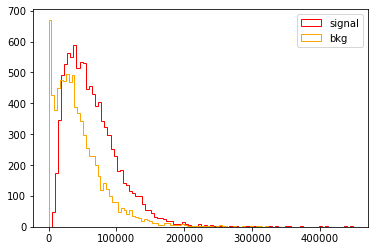

500GeV
lepton2_pt


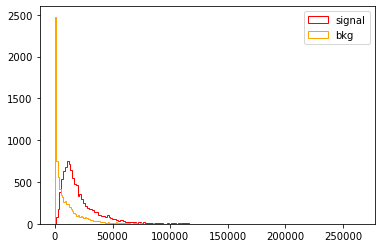

500GeV
lepton3_pt


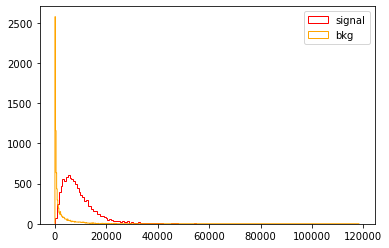

500GeV
lepton1_eta


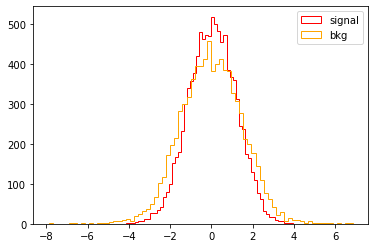

500GeV
lepton2_eta


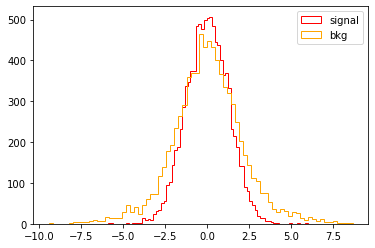

500GeV
lepton3_eta


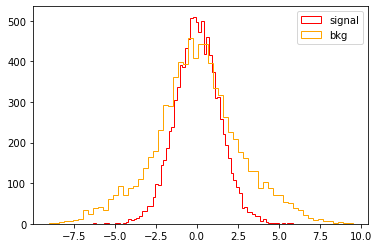

500GeV
lepton1_phi


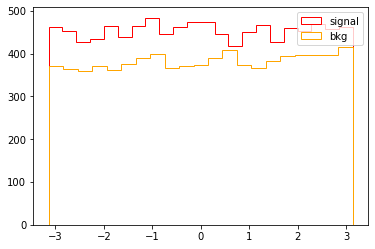

500GeV
lepton2_phi


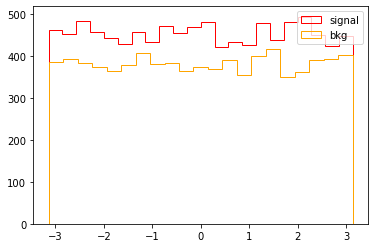

500GeV
lepton3_phi


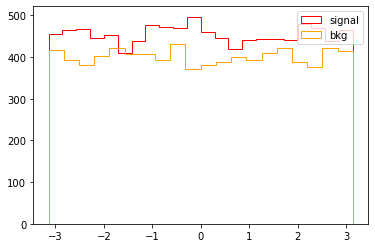

500GeV
MET


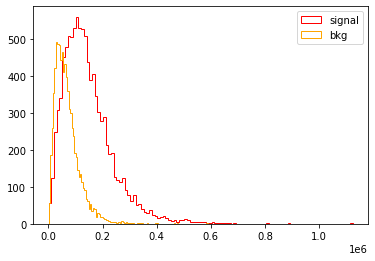

500GeV
MET_phi


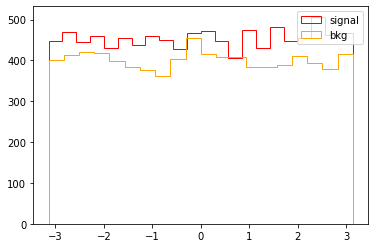

500GeV
lepton1_flavor


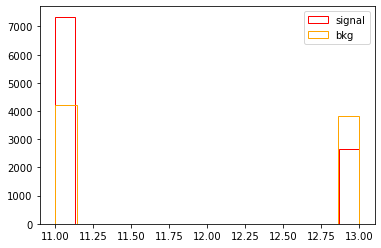

500GeV
lepton2_flavor


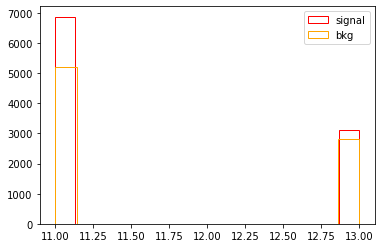

500GeV
lepton3_flavor


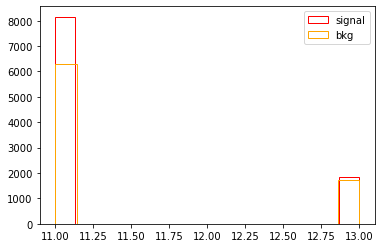

500GeV
lepton1_charge


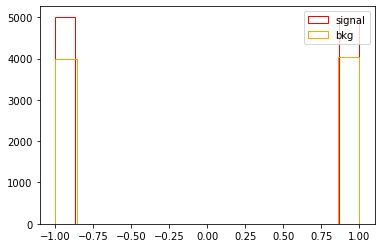

500GeV
lepton2_charge


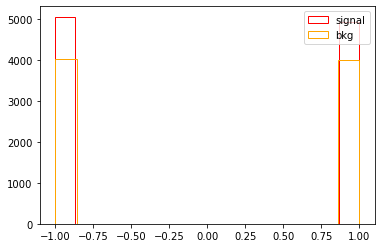

500GeV
lepton3_charge


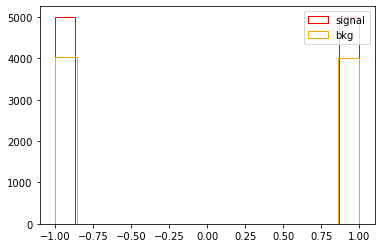

500GeV
signal


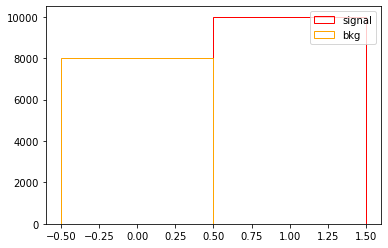

600GeV
lepton1_pt


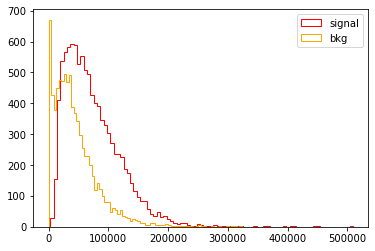

600GeV
lepton2_pt


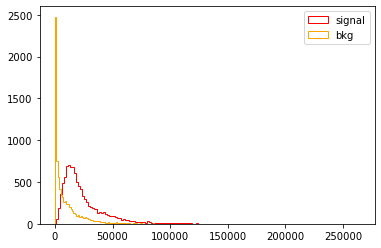

600GeV
lepton3_pt


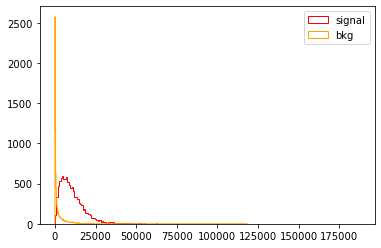

600GeV
lepton1_eta


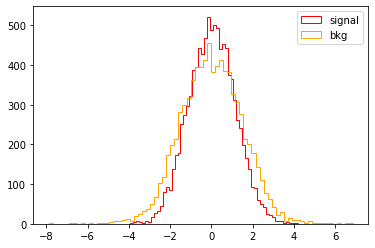

600GeV
lepton2_eta


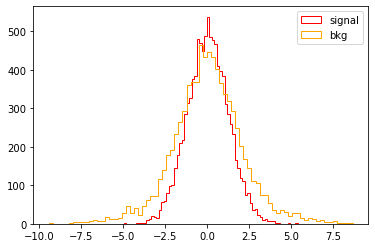

600GeV
lepton3_eta


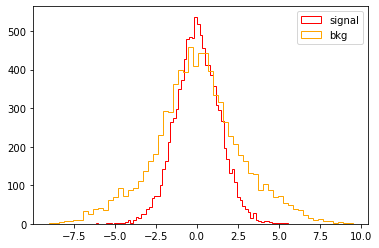

600GeV
lepton1_phi


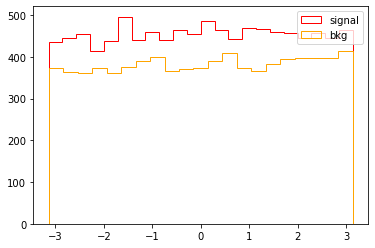

600GeV
lepton2_phi


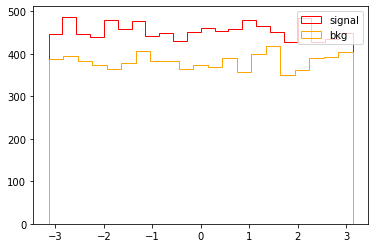

600GeV
lepton3_phi


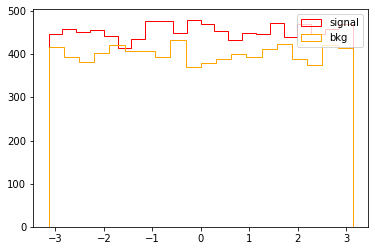

600GeV
MET


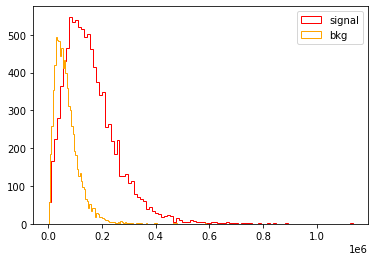

600GeV
MET_phi


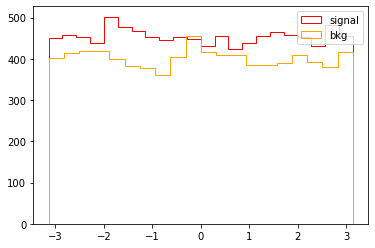

600GeV
lepton1_flavor


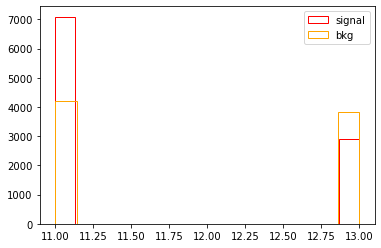

600GeV
lepton2_flavor


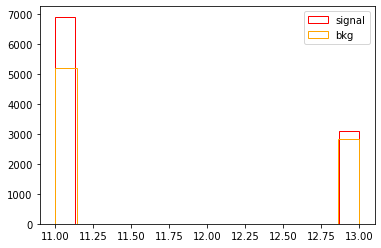

600GeV
lepton3_flavor


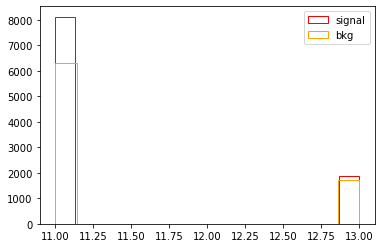

600GeV
lepton1_charge


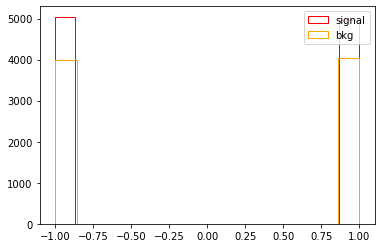

600GeV
lepton2_charge


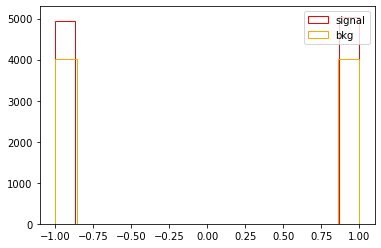

600GeV
lepton3_charge


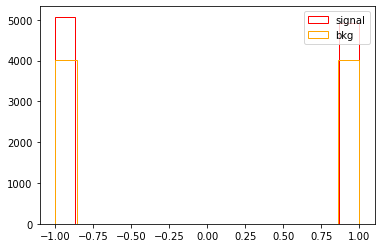

600GeV
signal


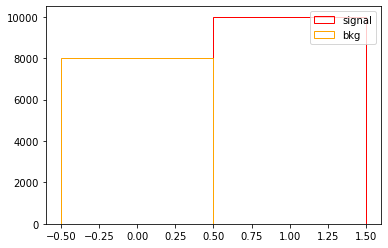

700GeV
lepton1_pt


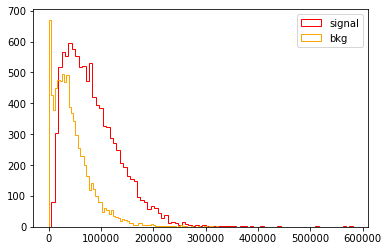

700GeV
lepton2_pt


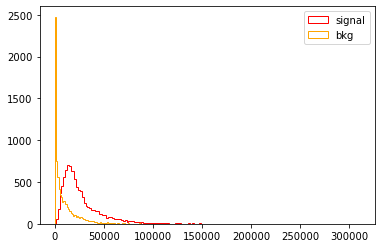

700GeV
lepton3_pt


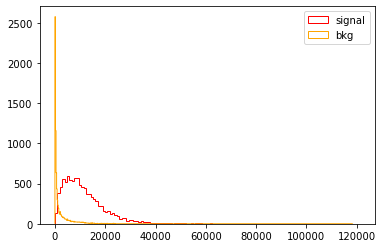

700GeV
lepton1_eta


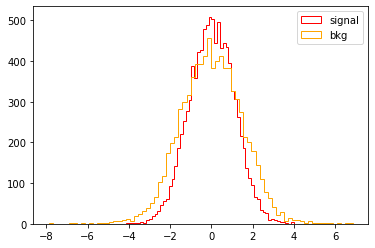

700GeV
lepton2_eta


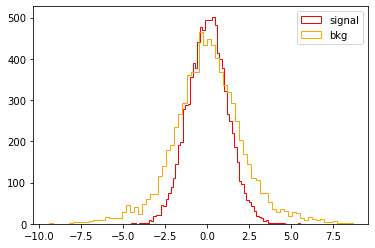

700GeV
lepton3_eta


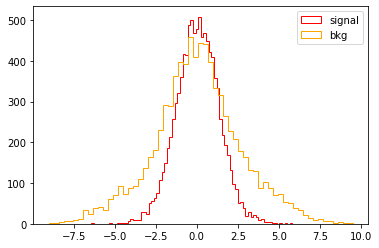

700GeV
lepton1_phi


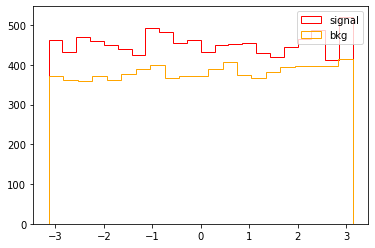

700GeV
lepton2_phi


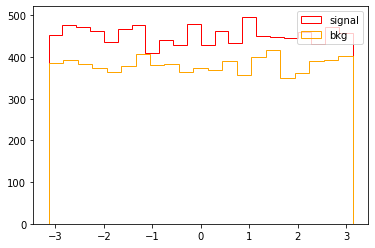

700GeV
lepton3_phi


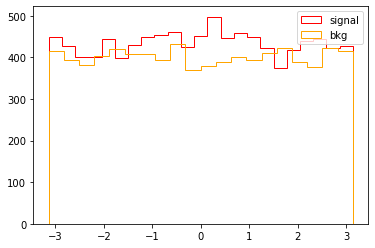

700GeV
MET


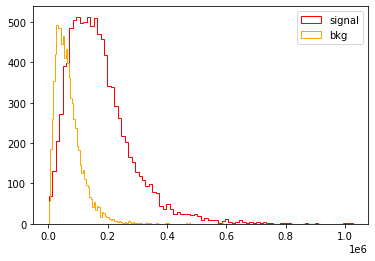

700GeV
MET_phi


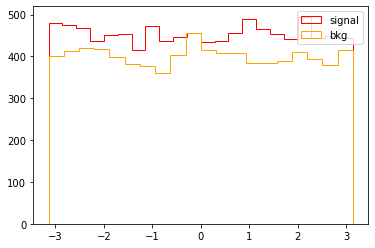

700GeV
lepton1_flavor


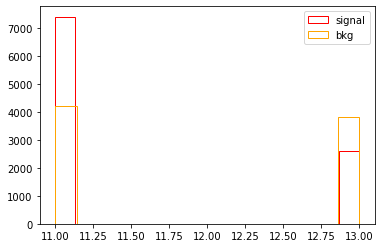

700GeV
lepton2_flavor


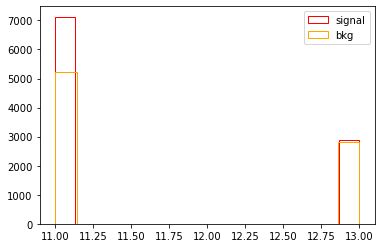

700GeV
lepton3_flavor


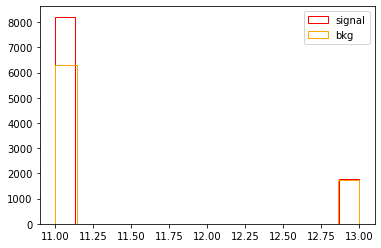

700GeV
lepton1_charge


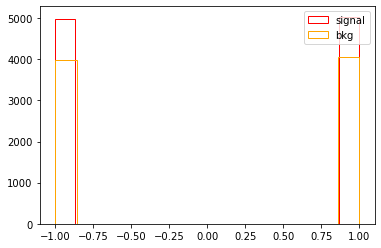

700GeV
lepton2_charge


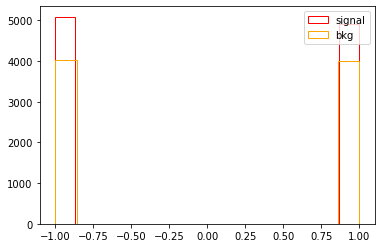

700GeV
lepton3_charge


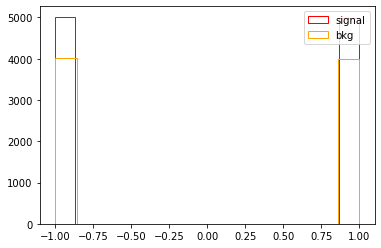

700GeV
signal


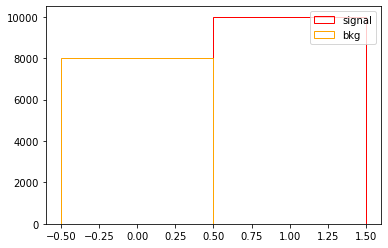

800GeV
lepton1_pt


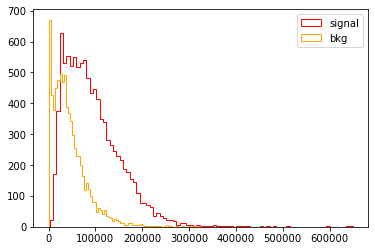

800GeV
lepton2_pt


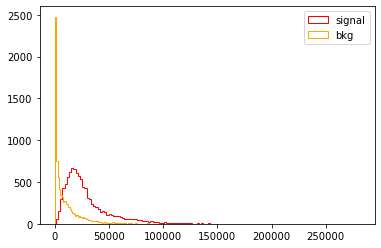

800GeV
lepton3_pt


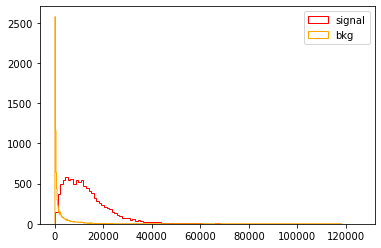

800GeV
lepton1_eta


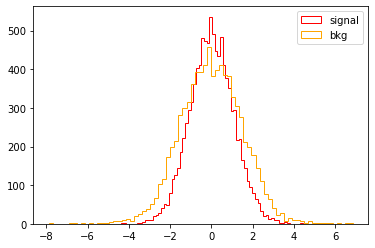

800GeV
lepton2_eta


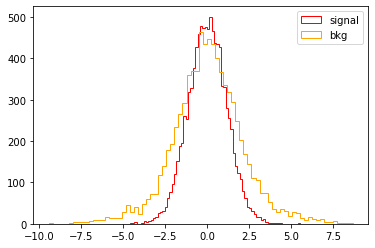

800GeV
lepton3_eta


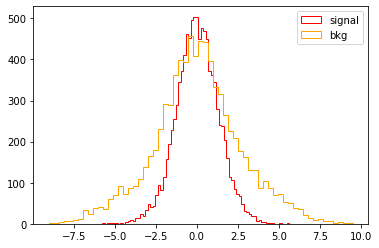

800GeV
lepton1_phi


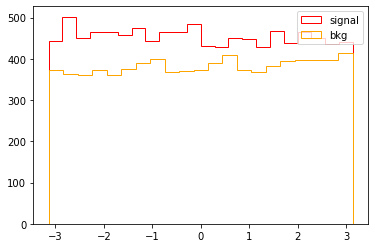

800GeV
lepton2_phi


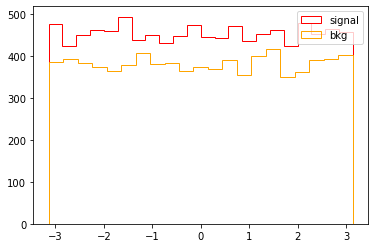

800GeV
lepton3_phi


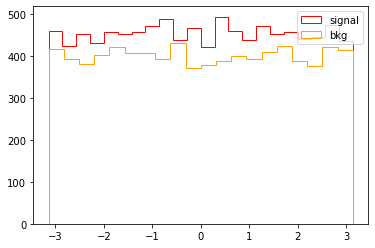

800GeV
MET


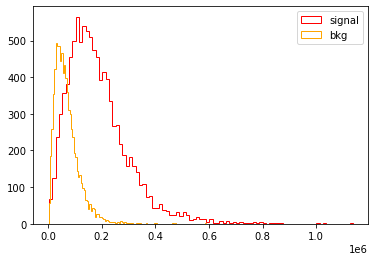

800GeV
MET_phi


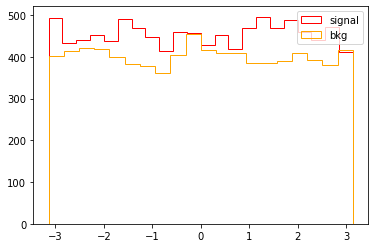

800GeV
lepton1_flavor


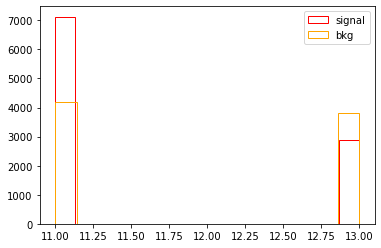

800GeV
lepton2_flavor


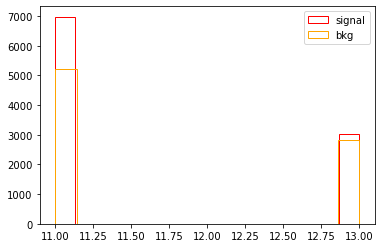

800GeV
lepton3_flavor


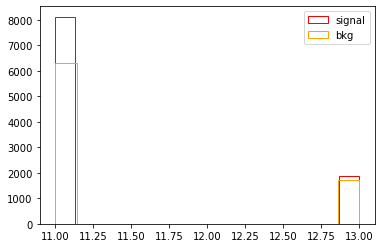

800GeV
lepton1_charge


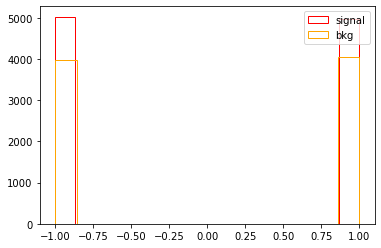

800GeV
lepton2_charge


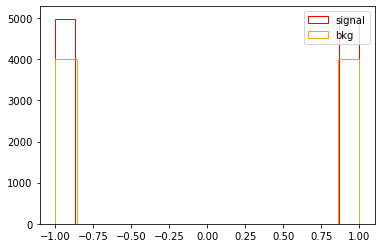

800GeV
lepton3_charge


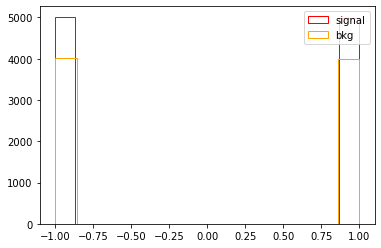

800GeV
signal


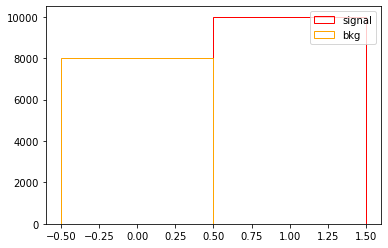

1000GeV
lepton1_pt


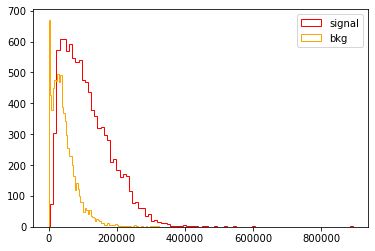

1000GeV
lepton2_pt


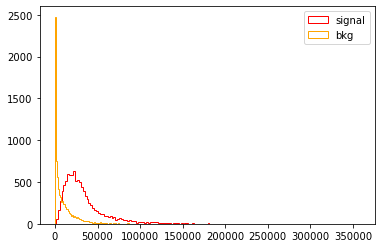

1000GeV
lepton3_pt


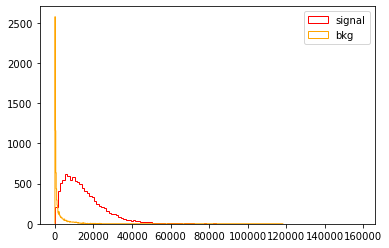

1000GeV
lepton1_eta


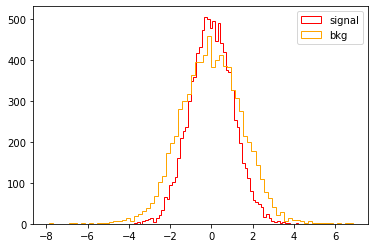

1000GeV
lepton2_eta


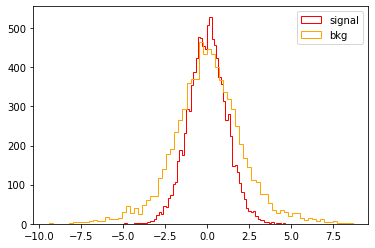

1000GeV
lepton3_eta


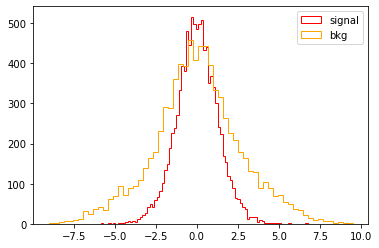

1000GeV
lepton1_phi


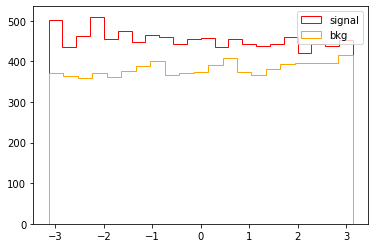

1000GeV
lepton2_phi


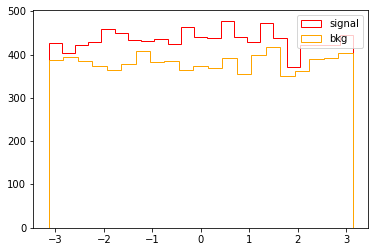

1000GeV
lepton3_phi


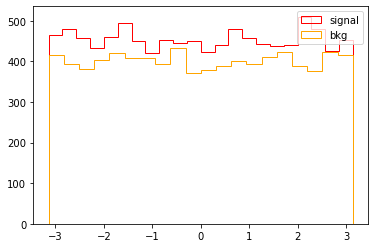

1000GeV
MET


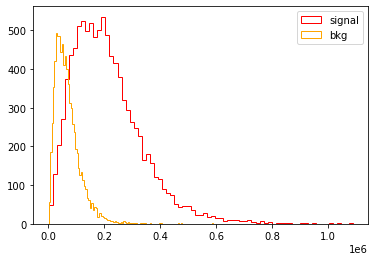

1000GeV
MET_phi


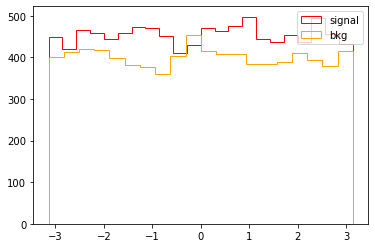

1000GeV
lepton1_flavor


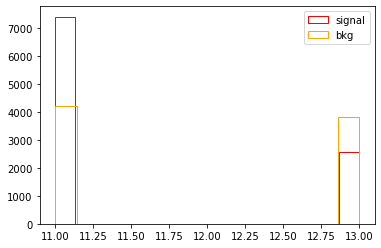

1000GeV
lepton2_flavor


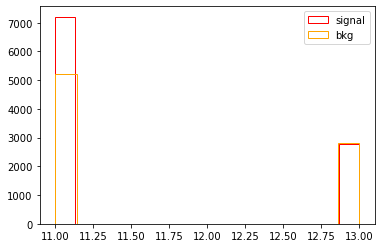

1000GeV
lepton3_flavor


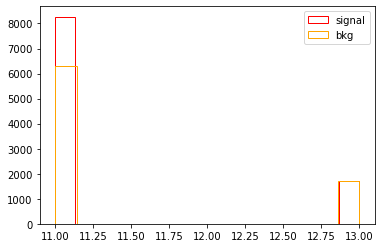

1000GeV
lepton1_charge


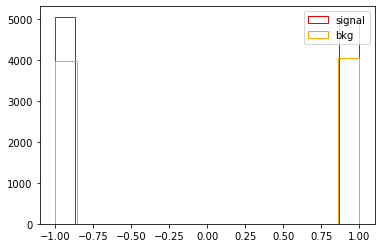

1000GeV
lepton2_charge


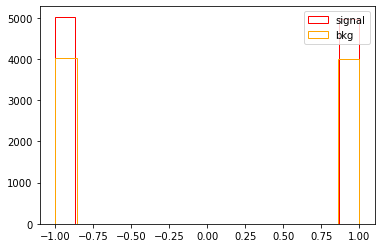

1000GeV
lepton3_charge


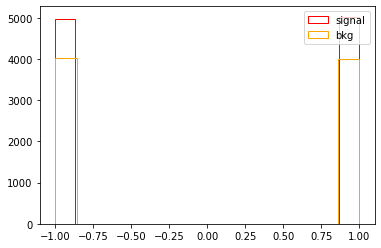

1000GeV
signal


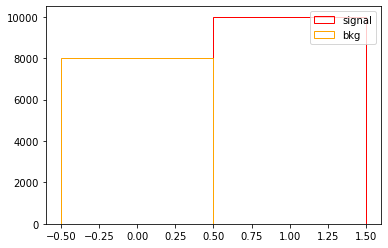

In [10]:
#overlay signal and background for variables list
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        plt.figure()
        plt.hist(df_sig[sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [11]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    return (n - n.min())/(n.max() - n.min())

In [12]:
series_list_500 = []
series_list_600 = [] 
series_list_700 = []
series_list_800 = [] 
series_list_1000 = []
series_list = [series_list_500,series_list_600,series_list_700,series_list_800,series_list_1000]
df_norm_sig = ['df_norm_sig500','df_norm_sig600','df_norm_sig700','df_norm_sig800','df_norm_sig1000']

In [13]:
#standardize signal stuff
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        if var == "signal":
            series_list[sig].append(df_sig[sig][var])
            continue
        #    if "flavor" or "charge" in var:
        #        series_list.append(df_sig[var])
        #        continue
        print (df_sig[sig][var])
        print (df_sig[sig][var].min())
        print (df_sig[sig][var].max())
        print (standardize_stuff(df_sig[sig][var]))
        print (series_list[sig].append((df_sig[sig][var] - df_sig[sig][var].min())/(df_sig[sig][var].max() - df_sig[sig][var].min())))

    df_norm_sig[sig] = pd.DataFrame(series_list[sig]).T

500GeV
lepton1_pt
0        21129.712328
1        51223.647380
2        27522.246619
3        39826.765666
4        73846.081111
            ...      
9994     57836.754394
9995     82267.948390
9996    158604.053425
9997     50689.739645
9998     54156.193987
Name: lepton1_pt, Length: 9999, dtype: float64
4471.00189537319
448967.4182774383
0       0.037478
1       0.105181
2       0.051859
3       0.079541
4       0.156076
          ...   
9994    0.120059
9995    0.175023
9996    0.346759
9997    0.103980
9998    0.111779
Name: lepton1_pt, Length: 9999, dtype: float64
None
500GeV
lepton2_pt
0        8269.352203
1       49251.446265
2       14844.470824
3       15952.419812
4       25043.146401
            ...     
9994    16358.954455
9995    13332.932050
9996    13834.181300
9997    18812.107033
9998    25486.287013
Name: lepton2_pt, Length: 9999, dtype: float64
764.6381379172121
253686.0568487054
0       0.029672
1       0.191707
2       0.055669
3       0.060049
4       0.095992
  

600GeV
lepton1_pt
0        40595.999310
1        26979.609328
2       110034.655358
3        48669.005122
4        32769.991936
            ...      
9994    131818.544076
9995    132506.654048
9996     70621.578518
9997     25359.307653
9998    146096.490211
Name: lepton1_pt, Length: 9999, dtype: float64
3132.0617788700997
509468.70687236375
0       0.073990
1       0.047098
2       0.211129
3       0.089934
4       0.058534
          ...   
9994    0.254152
9995    0.255511
9996    0.133290
9997    0.043898
9998    0.282351
Name: lepton1_pt, Length: 9999, dtype: float64
None
600GeV
lepton2_pt
0       39750.354045
1       21809.757625
2       11422.031686
3       17847.509185
4       23496.607850
            ...     
9994    91501.577298
9995    17082.925361
9996    28781.280710
9997     4909.981649
9998    28165.747329
Name: lepton2_pt, Length: 9999, dtype: float64
817.4205525814474
254833.61896542023
0       0.153269
1       0.082642
2       0.041748
3       0.067043
4       0.08928

700GeV
lepton1_pt
0        59398.268813
1        52813.199459
2        23091.643516
3        49743.909683
4       179337.045385
            ...      
9994     80447.209516
9995    109619.111624
9996     72069.752838
9997     77135.726711
9998     77135.726711
Name: lepton1_pt, Length: 9999, dtype: float64
5196.697969632813
581023.3134268239
0       0.094128
1       0.082692
2       0.031077
3       0.077362
4       0.302418
          ...   
9994    0.130683
9995    0.181343
9996    0.116134
9997    0.124932
9998    0.124932
Name: lepton1_pt, Length: 9999, dtype: float64
None
700GeV
lepton2_pt
0       52080.897572
1       41332.383305
2       22812.982960
3       14142.992266
4       45000.322643
            ...     
9994    74078.166217
9995    16415.076930
9996    57949.595039
9997    55860.559626
9998    55860.559626
Name: lepton2_pt, Length: 9999, dtype: float64
919.7716210075278
310165.9800937545
0       0.165438
1       0.130681
2       0.070795
3       0.042760
4       0.142542
 

800GeV
lepton1_pt
0       136034.546132
1        61646.166342
2        81590.973653
3        32642.536159
4        58125.163709
            ...      
9994     44974.249533
9995    105238.017161
9996    164494.548648
9997    188242.360868
9998     92951.385865
Name: lepton1_pt, Length: 9999, dtype: float64
2199.075885092817
649914.4369784639
0       0.206627
1       0.091780
2       0.122572
3       0.047001
4       0.086344
          ...   
9994    0.066040
9995    0.159081
9996    0.250566
9997    0.287230
9998    0.140111
Name: lepton1_pt, Length: 9999, dtype: float64
None
800GeV
lepton2_pt
0       15946.349741
1       14181.131880
2       15342.552200
3       24142.879938
4       47247.979479
            ...     
9994    40437.158679
9995     5086.408890
9996    24622.120561
9997     3932.680822
9998    26210.345261
Name: lepton2_pt, Length: 9999, dtype: float64
878.6826496818755
280923.82015338703
0       0.053804
1       0.047501
2       0.051648
3       0.083073
4       0.165578


1000GeV
lepton1_pt
0        98576.724587
1        82464.071225
2       108483.677197
3        96822.701807
4       160783.020718
            ...      
9994    196549.976920
9995     42727.668171
9996    212072.570902
9997     99953.534029
9998    197658.579086
Name: lepton1_pt, Length: 9999, dtype: float64
4682.9639672221
892295.2481901682
0       0.105782
1       0.087630
2       0.116944
3       0.103806
4       0.175865
          ...   
9994    0.216161
9995    0.042862
9996    0.233649
9997    0.107334
9998    0.217410
Name: lepton1_pt, Length: 9999, dtype: float64
None
1000GeV
lepton2_pt
0        25674.612240
1        28947.884183
2        29396.799862
3        27903.019629
4       109158.295565
            ...      
9994     37881.976444
9995     33175.606619
9996     18286.785118
9997     16814.031762
9998     50231.137614
Name: lepton2_pt, Length: 9999, dtype: float64
1054.3715865312456
357309.2027939462
0       0.069109
1       0.078297
2       0.079557
3       0.075364
4     

In [14]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list_bkg.append(df_bkg[var])
#        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_pt
41.53723943871653
323240.0279824057
0       0.186855
1       0.111797
2       0.355622
3       0.020683
4       0.229062
          ...   
8020    0.263071
8021    0.236736
8022    0.107271
8023    0.100759
8024    0.163506
Name: lepton1_pt, Length: 8025, dtype: float64
None
lepton2_pt
6.437711598224528
264176.89704024
0       0.006685
1       0.001152
2       0.000487
3       0.017787
4       0.000608
          ...   
8020    0.027283
8021    0.152100
8022    0.050809
8023    0.080548
8024    0.002237
Name: lepton2_pt, Length: 8025, dtype: float64
None
lepton3_pt
0.2099760795827351
118386.58237564762
0       0.001342
1       0.001186
2       0.000304
3       0.006135
4       0.000808
          ...   
8020    0.033598
8021    0.058835
8022    0.026921
8023    0.003328
8024    0.004324
Name: lepton3_pt, Length: 8025, dtype: float64
None
lepton1_eta
-7.894474604190413
6.856341237899719
0       0.544573
1       0.677497
2       0.431906
3       0.711447
4       0.556851
        

In [15]:
df_norm_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,signal
0,0.186855,0.006685,0.001342,0.544573,0.525425,0.491514,0.909965,0.654779,0.651089,0.134813,0.755702,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.111797,0.001152,0.001186,0.677497,0.501016,0.167163,0.955614,0.176183,0.294901,0.016548,0.633757,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.355622,0.000487,0.000304,0.431906,0.238603,0.209991,0.334281,0.769541,0.770263,0.051584,0.409363,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.020683,0.017787,0.006135,0.711447,0.496457,0.675541,0.354861,0.001844,0.583166,0.170198,0.455502,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.229062,0.000608,0.000808,0.556851,0.572221,0.527403,0.405220,0.516686,0.492029,0.039059,0.104531,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,0.263071,0.027283,0.033598,0.626016,0.542818,0.607011,0.136460,0.375055,0.444424,0.033326,0.859516,1.0,1.0,0.0,1.0,0.0,1.0,0.0
8021,0.236736,0.152100,0.058835,0.644795,0.619646,0.452034,0.738526,0.881093,0.285213,0.054222,0.591513,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8022,0.107271,0.050809,0.026921,0.556450,0.499733,0.544057,0.147833,0.954684,0.741045,0.125666,0.928671,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8023,0.100759,0.080548,0.003328,0.524029,0.550730,0.824924,0.841466,0.903993,0.945544,0.026252,0.349131,1.0,0.0,0.0,0.0,1.0,1.0,0.0


500GeV
lepton1_pt


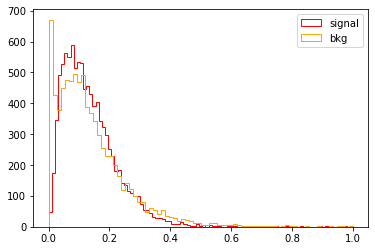

500GeV
lepton2_pt


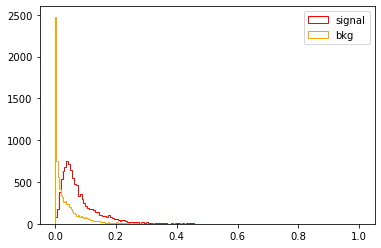

500GeV
lepton3_pt


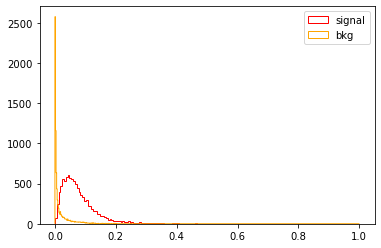

500GeV
lepton1_eta


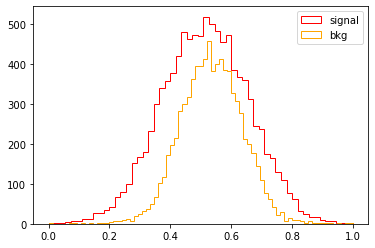

500GeV
lepton2_eta


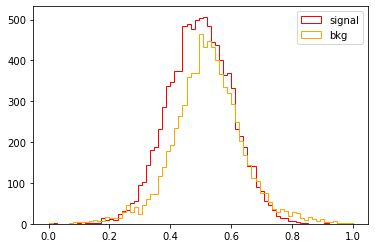

500GeV
lepton3_eta


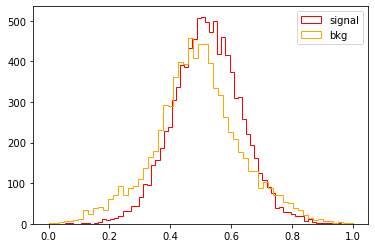

500GeV
lepton1_phi


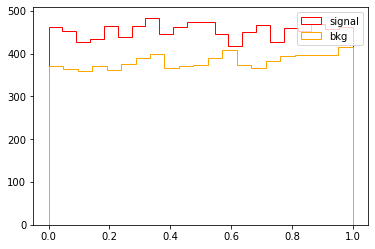

500GeV
lepton2_phi


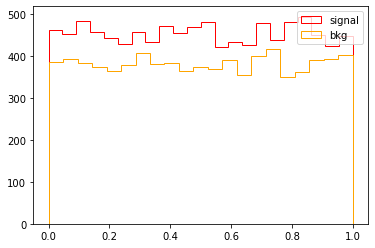

500GeV
lepton3_phi


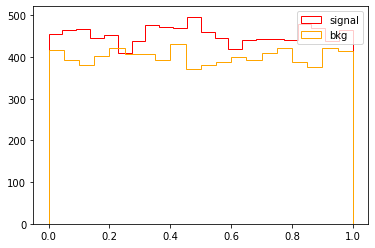

500GeV
MET


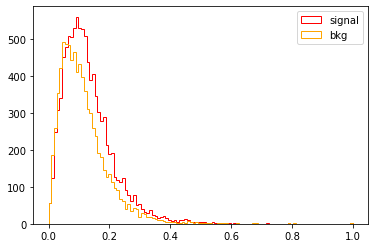

500GeV
MET_phi


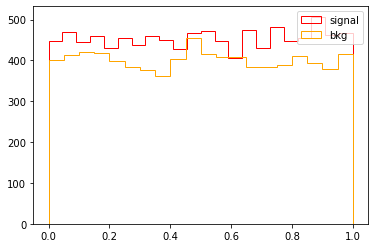

500GeV
lepton1_flavor


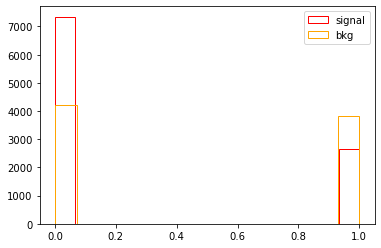

500GeV
lepton2_flavor


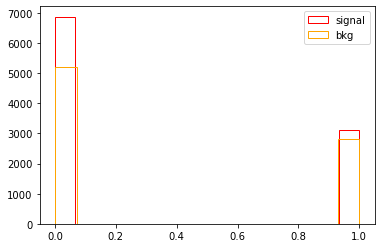

500GeV
lepton3_flavor


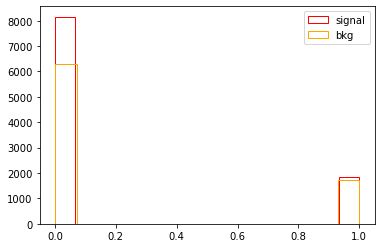

500GeV
lepton1_charge


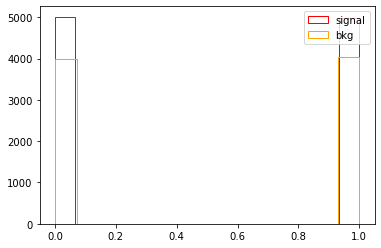

500GeV
lepton2_charge


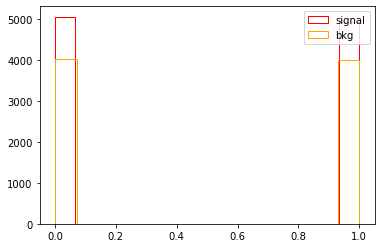

500GeV
lepton3_charge


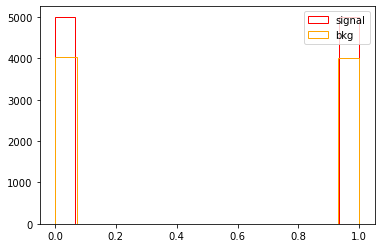

500GeV
signal


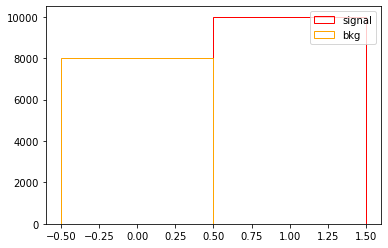

600GeV
lepton1_pt


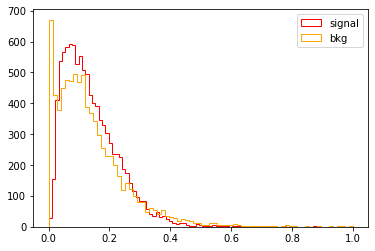

600GeV
lepton2_pt


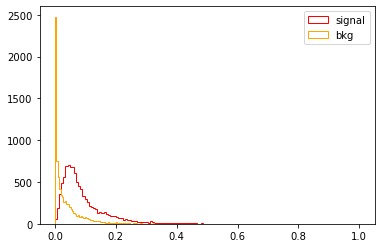

600GeV
lepton3_pt


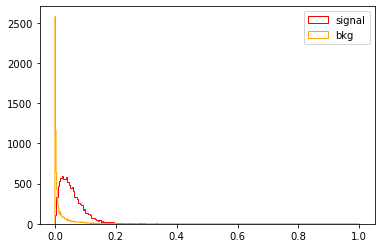

600GeV
lepton1_eta


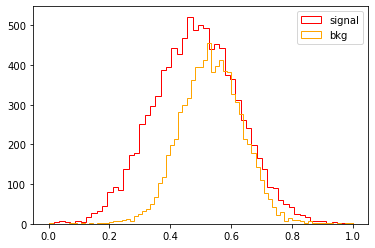

600GeV
lepton2_eta


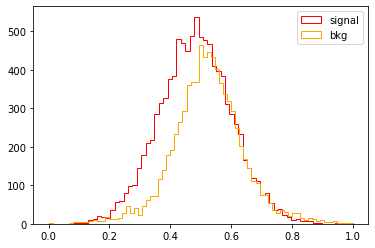

600GeV
lepton3_eta


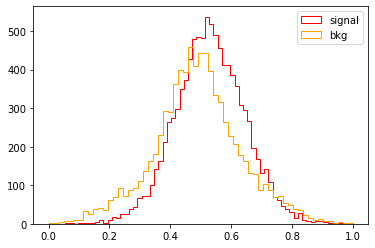

600GeV
lepton1_phi


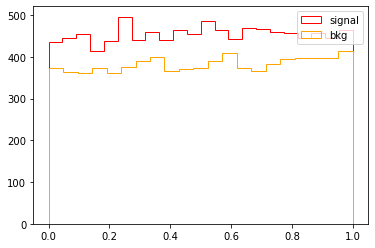

600GeV
lepton2_phi


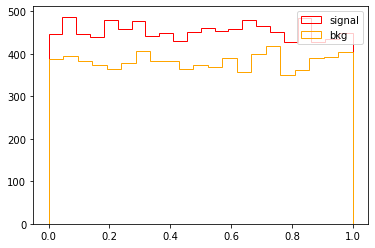

600GeV
lepton3_phi


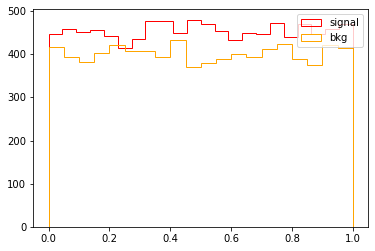

600GeV
MET


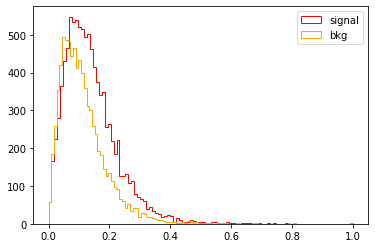

600GeV
MET_phi


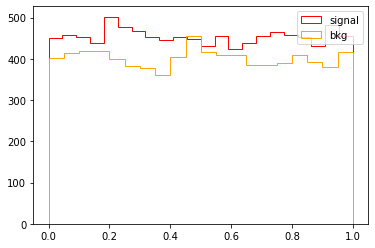

600GeV
lepton1_flavor


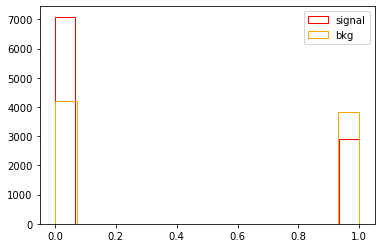

600GeV
lepton2_flavor


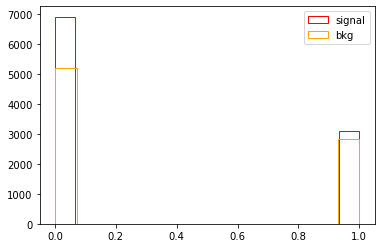

600GeV
lepton3_flavor


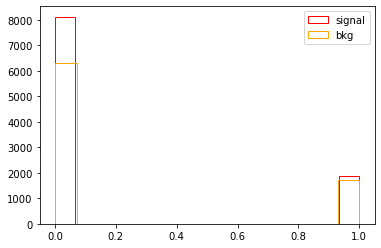

600GeV
lepton1_charge


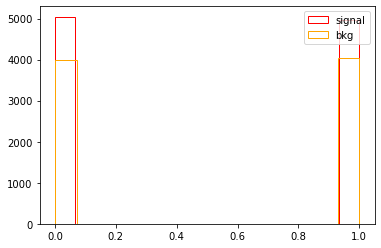

600GeV
lepton2_charge


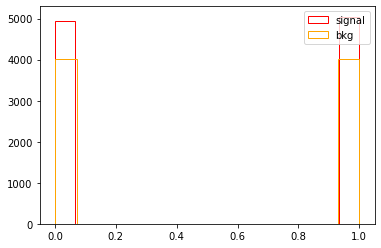

600GeV
lepton3_charge


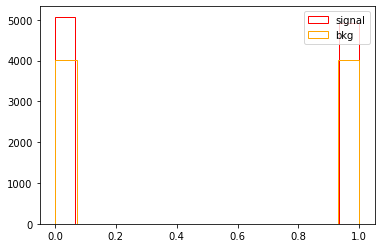

600GeV
signal


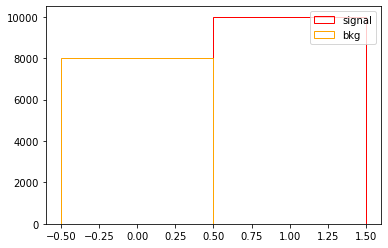

700GeV
lepton1_pt


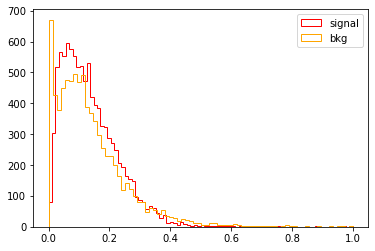

700GeV
lepton2_pt


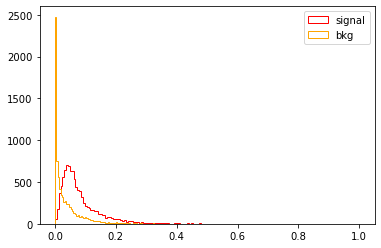

700GeV
lepton3_pt


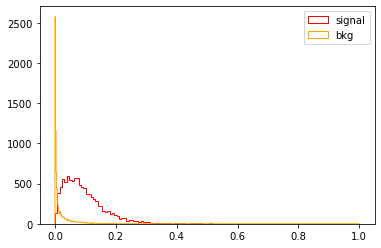

700GeV
lepton1_eta


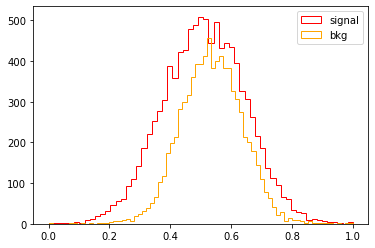

700GeV
lepton2_eta


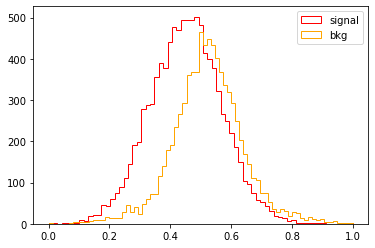

700GeV
lepton3_eta


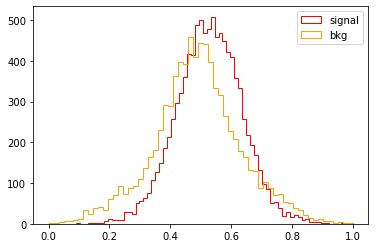

700GeV
lepton1_phi


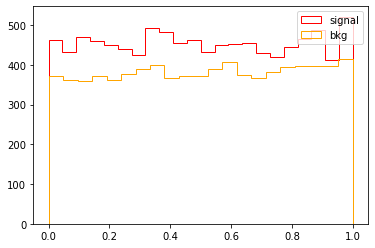

700GeV
lepton2_phi


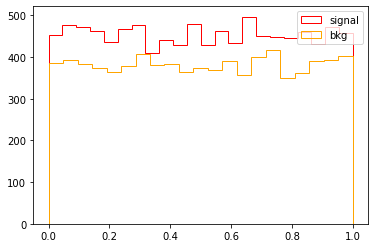

700GeV
lepton3_phi


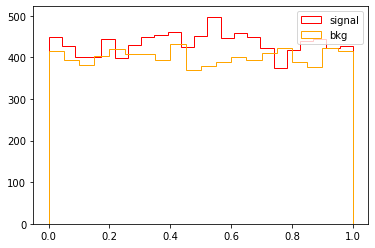

700GeV
MET


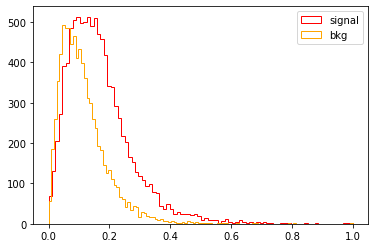

700GeV
MET_phi


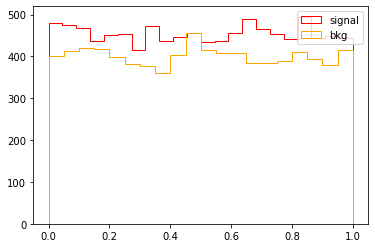

700GeV
lepton1_flavor


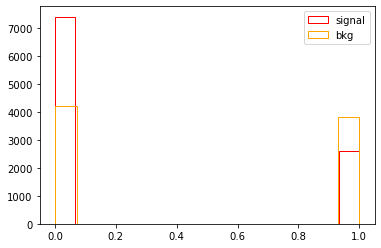

700GeV
lepton2_flavor


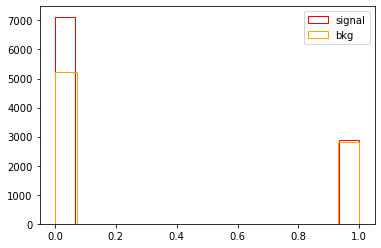

700GeV
lepton3_flavor


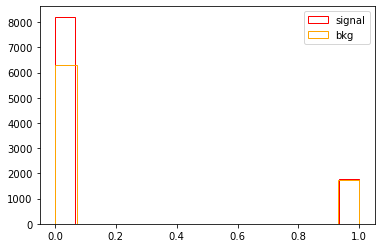

700GeV
lepton1_charge


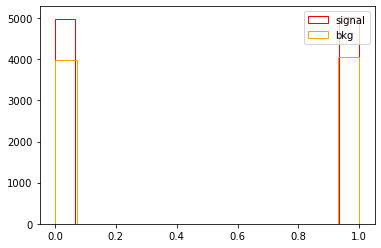

700GeV
lepton2_charge


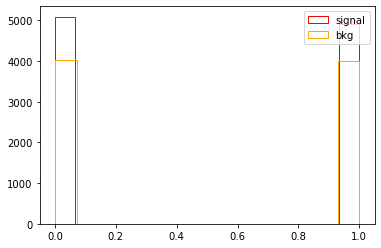

700GeV
lepton3_charge


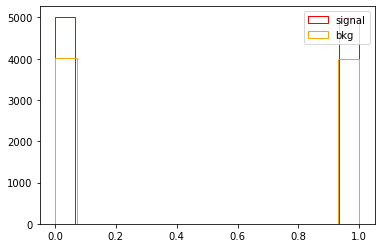

700GeV
signal


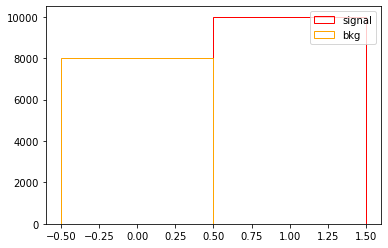

800GeV
lepton1_pt


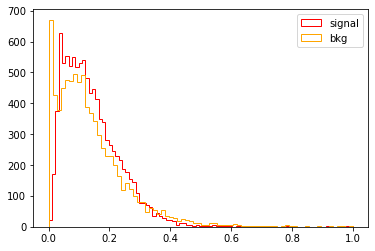

800GeV
lepton2_pt


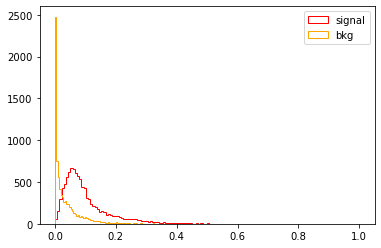

800GeV
lepton3_pt


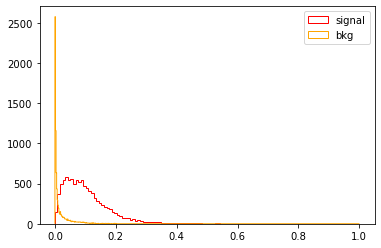

800GeV
lepton1_eta


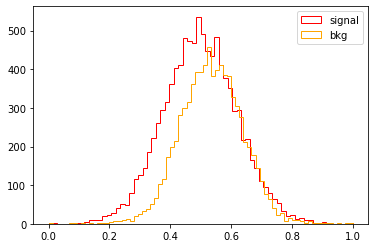

800GeV
lepton2_eta


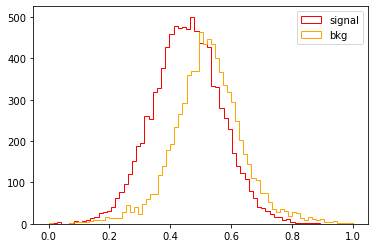

800GeV
lepton3_eta


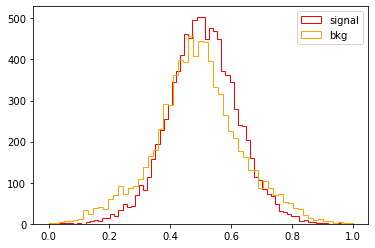

800GeV
lepton1_phi


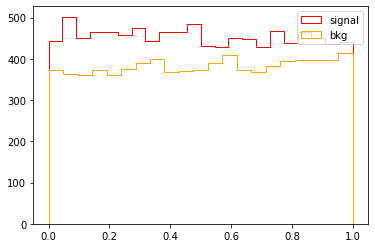

800GeV
lepton2_phi


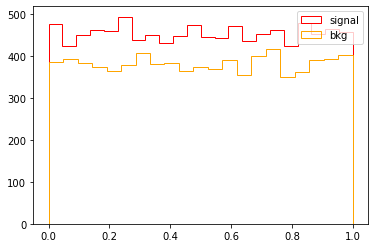

800GeV
lepton3_phi


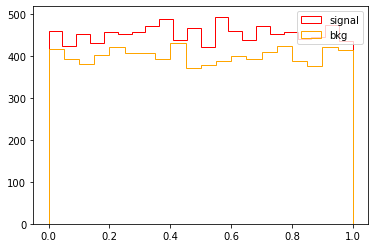

800GeV
MET


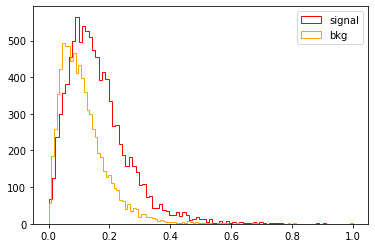

800GeV
MET_phi


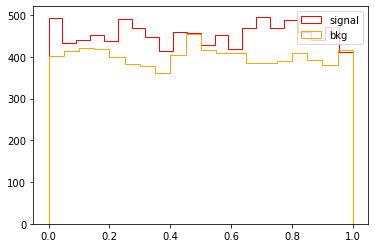

800GeV
lepton1_flavor


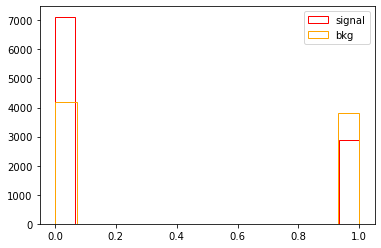

800GeV
lepton2_flavor


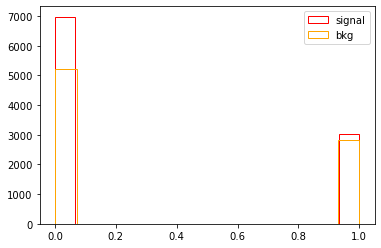

800GeV
lepton3_flavor


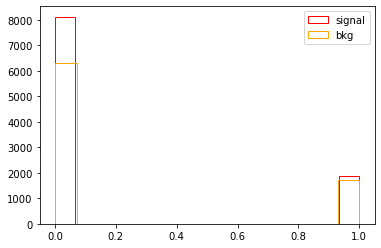

800GeV
lepton1_charge


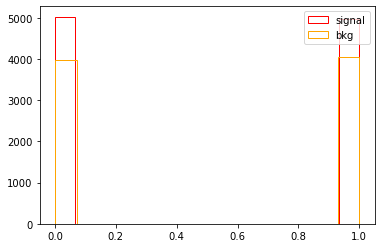

800GeV
lepton2_charge


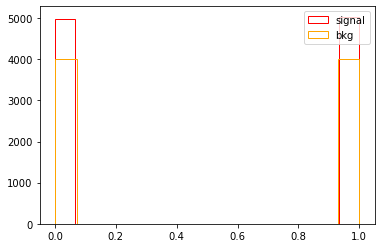

800GeV
lepton3_charge


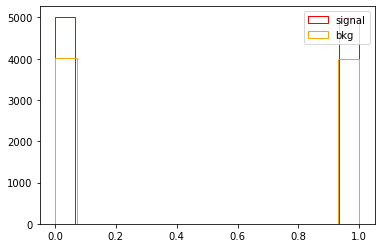

800GeV
signal


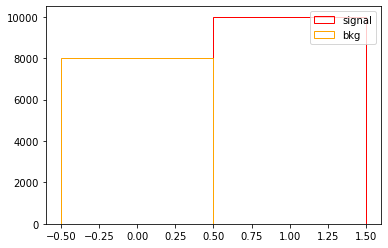

1000GeV
lepton1_pt


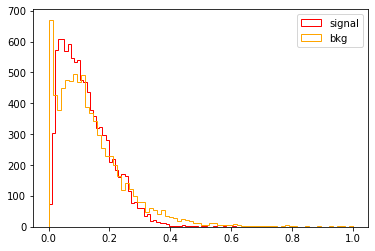

1000GeV
lepton2_pt


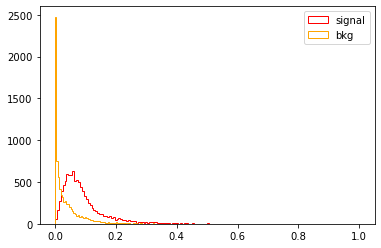

1000GeV
lepton3_pt


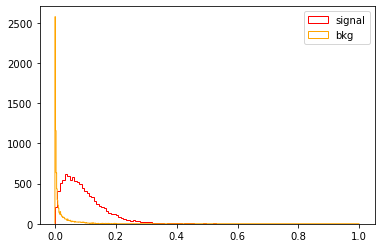

1000GeV
lepton1_eta


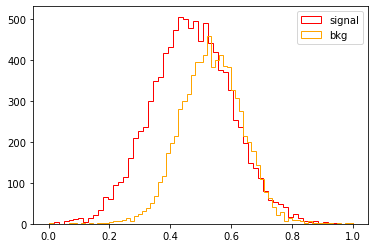

1000GeV
lepton2_eta


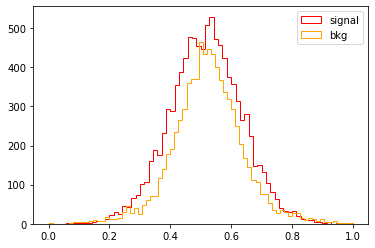

1000GeV
lepton3_eta


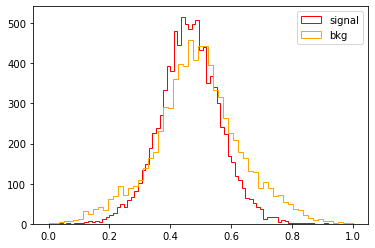

1000GeV
lepton1_phi


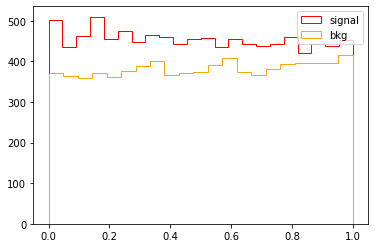

1000GeV
lepton2_phi


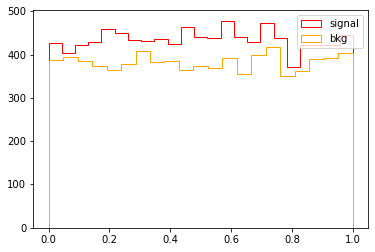

1000GeV
lepton3_phi


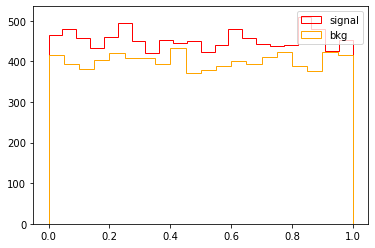

1000GeV
MET


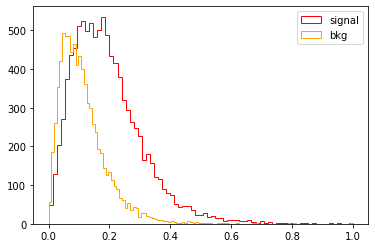

1000GeV
MET_phi


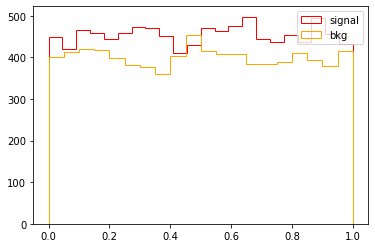

1000GeV
lepton1_flavor


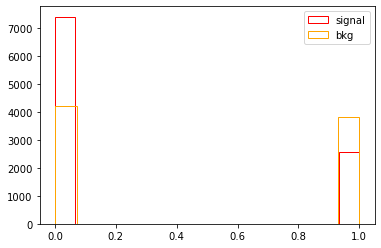

1000GeV
lepton2_flavor


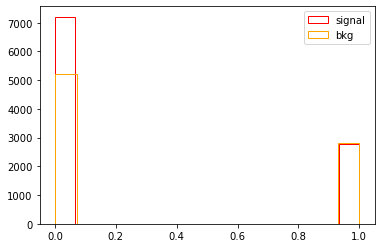

1000GeV
lepton3_flavor


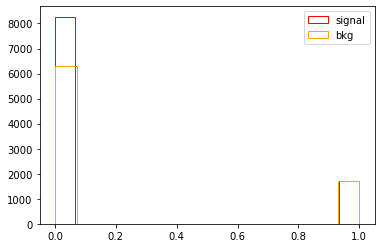

1000GeV
lepton1_charge


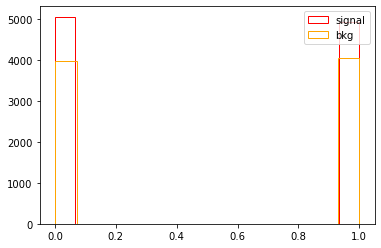

1000GeV
lepton2_charge


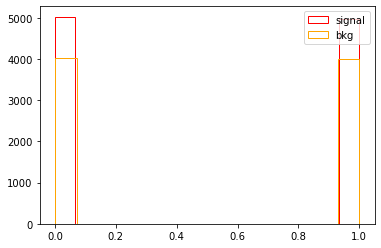

1000GeV
lepton3_charge


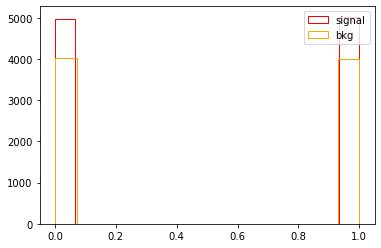

1000GeV
signal


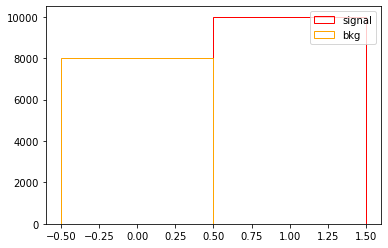

In [16]:
#Overlay standardized signal and bkg
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        plt.figure()
        plt.hist(df_norm_sig[sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [17]:
#using 80% of the (signal + bkg) data for training and the rest for test

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train_500 = pd.concat([df_norm_sig[0].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_500 =  pd.concat([df_norm_sig[0].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_500 = sklearn.utils.shuffle(df_train_500)
df_test_500 = sklearn.utils.shuffle(df_test_500)

#Reindex [0:n]
x_train_500 = df_train_500[variable].reset_index(drop=True)
y_train_500 = df_train_500["signal"].reset_index(drop=True)

x_test_500 = df_test_500[variable].reset_index(drop=True)
y_test_500 = df_test_500["signal"].reset_index(drop=True)

In [18]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_600 = pd.concat([df_norm_sig[1].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_600 =  pd.concat([df_norm_sig[1].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_600 = sklearn.utils.shuffle(df_train_600)
df_test_600 = sklearn.utils.shuffle(df_test_600)

#Reindex [0:n]
x_train_600 = df_train_600[variable].reset_index(drop=True)
y_train_600 = df_train_600["signal"].reset_index(drop=True)

x_test_600 = df_test_600[variable].reset_index(drop=True)
y_test_600 = df_test_600["signal"].reset_index(drop=True)

In [19]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_700 = pd.concat([df_norm_sig[2].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_700 =  pd.concat([df_norm_sig[2].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_700 = sklearn.utils.shuffle(df_train_700)
df_test_700 = sklearn.utils.shuffle(df_test_700)

#Reindex [0:n]
x_train_700 = df_train_700[variable].reset_index(drop=True)
y_train_700 = df_train_700["signal"].reset_index(drop=True)

x_test_700 = df_test_700[variable].reset_index(drop=True)
y_test_700 = df_test_700["signal"].reset_index(drop=True)

In [20]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_800 = pd.concat([df_norm_sig[3].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_800 =  pd.concat([df_norm_sig[3].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_800 = sklearn.utils.shuffle(df_train_800)
df_test_800 = sklearn.utils.shuffle(df_test_800)

#Reindex [0:n]
x_train_800 = df_train_800[variable].reset_index(drop=True)
y_train_800 = df_train_800["signal"].reset_index(drop=True)

x_test_800 = df_test_800[variable].reset_index(drop=True)
y_test_800 = df_test_800["signal"].reset_index(drop=True)

In [21]:
#using 80% of the (signal + bkg) data for training and the rest for test
df_train_1000 = pd.concat([df_norm_sig[4].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_1000 =  pd.concat([df_norm_sig[4].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_1000 = sklearn.utils.shuffle(df_train_1000)
df_test_1000 = sklearn.utils.shuffle(df_test_1000)

#Reindex [0:n]
x_train_1000 = df_train_1000[variable].reset_index(drop=True)
y_train_1000 = df_train_1000["signal"].reset_index(drop=True)

x_test_1000 = df_test_1000[variable].reset_index(drop=True)
y_test_1000 = df_test_1000["signal"].reset_index(drop=True)

In [22]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

500GeV
lepton1_pt


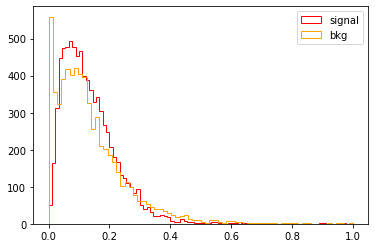

500GeV
lepton2_pt


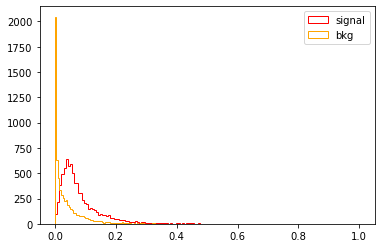

500GeV
lepton3_pt


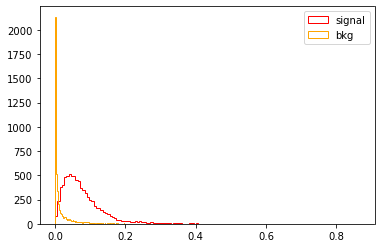

500GeV
lepton1_eta


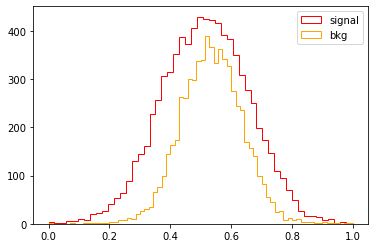

500GeV
lepton2_eta


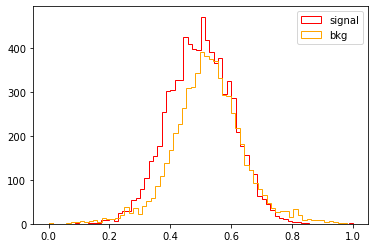

500GeV
lepton3_eta


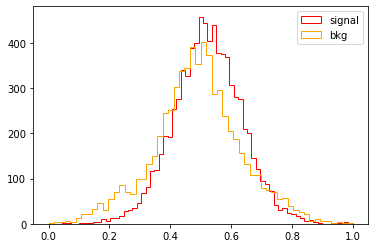

500GeV
lepton1_phi


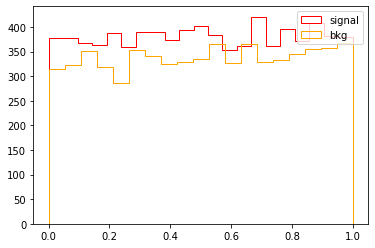

500GeV
lepton2_phi


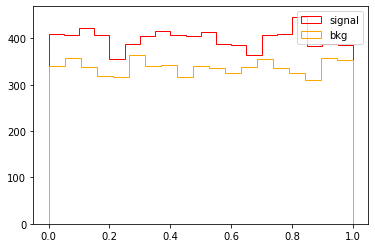

500GeV
lepton3_phi


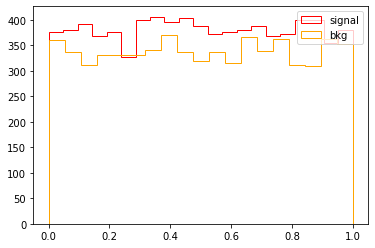

500GeV
MET


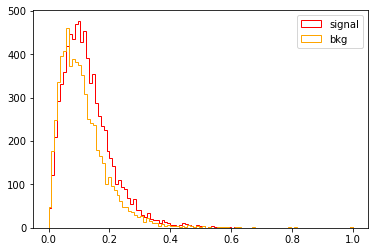

500GeV
MET_phi


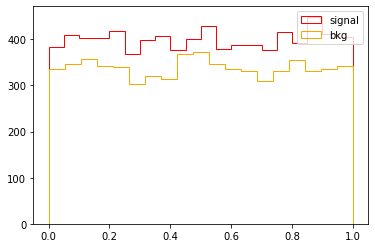

500GeV
lepton1_flavor


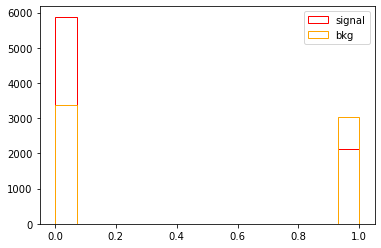

500GeV
lepton2_flavor


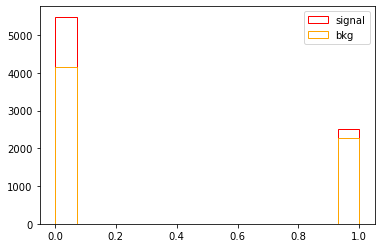

500GeV
lepton3_flavor


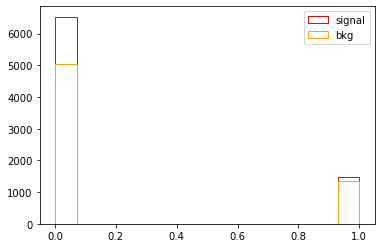

500GeV
lepton1_charge


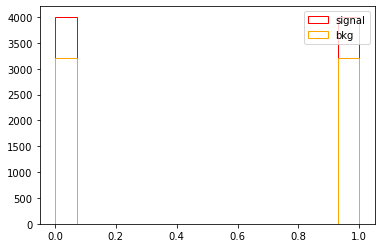

500GeV
lepton2_charge


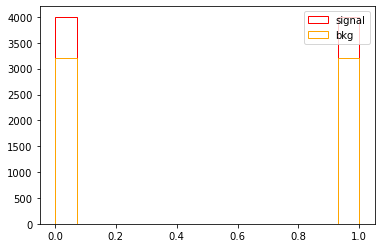

500GeV
lepton3_charge


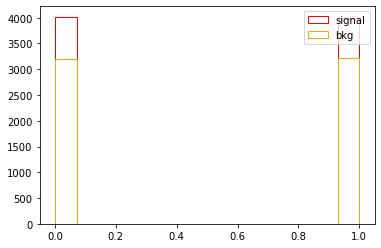

500GeV
signal


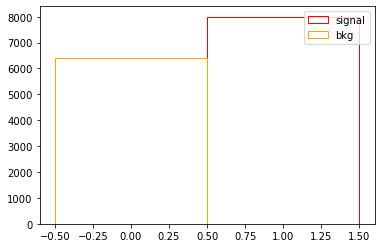

600GeV
lepton1_pt


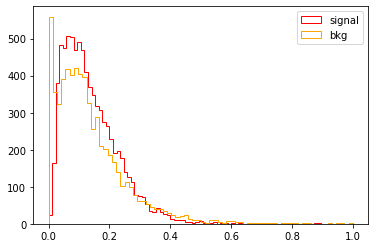

600GeV
lepton2_pt


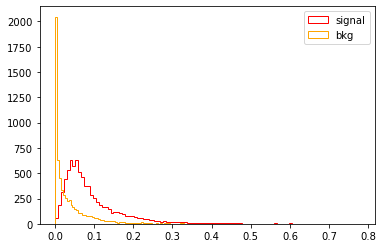

600GeV
lepton3_pt


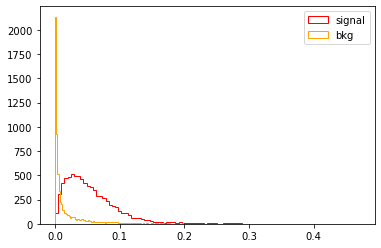

600GeV
lepton1_eta


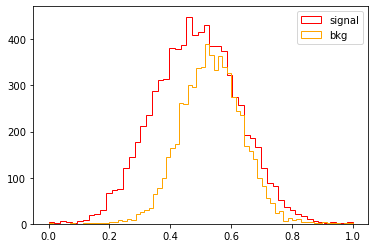

600GeV
lepton2_eta


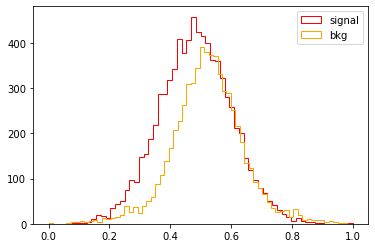

600GeV
lepton3_eta


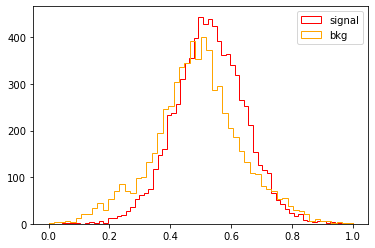

600GeV
lepton1_phi


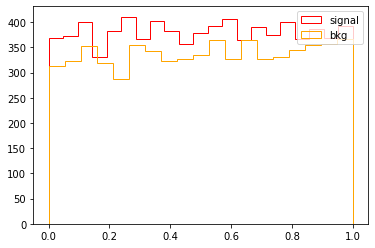

600GeV
lepton2_phi


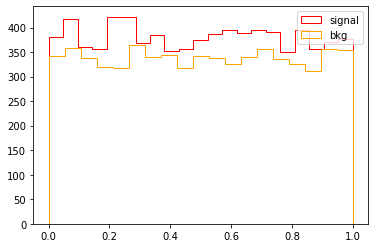

600GeV
lepton3_phi


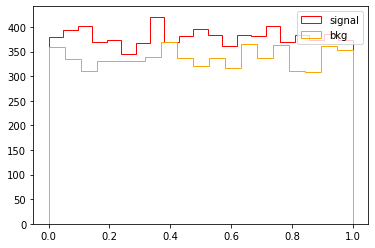

600GeV
MET


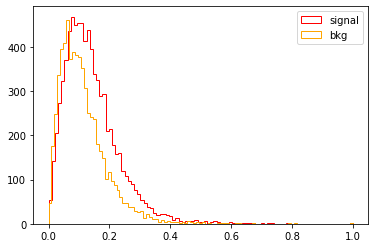

600GeV
MET_phi


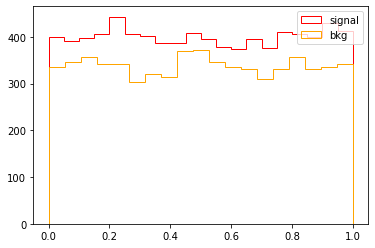

600GeV
lepton1_flavor


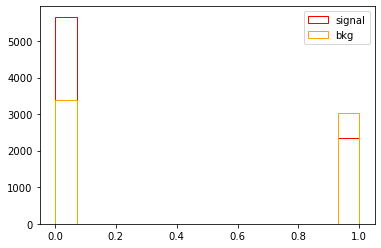

600GeV
lepton2_flavor


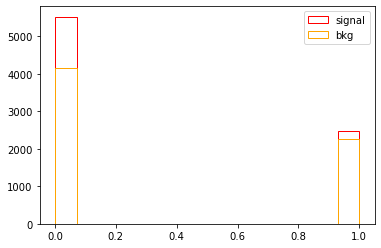

600GeV
lepton3_flavor


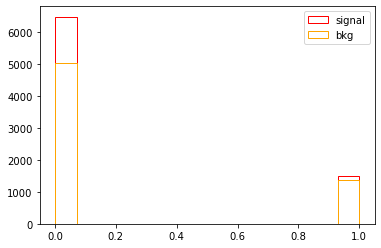

600GeV
lepton1_charge


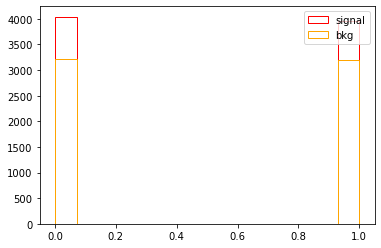

600GeV
lepton2_charge


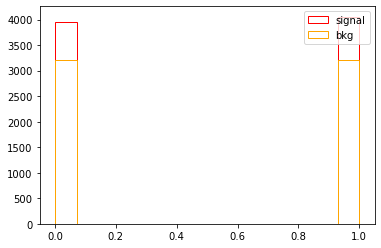

600GeV
lepton3_charge


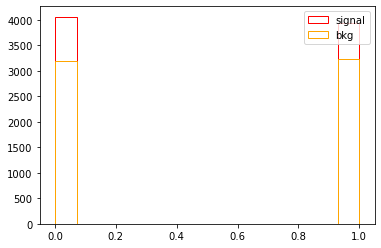

600GeV
signal


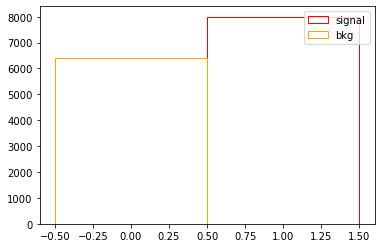

700GeV
lepton1_pt


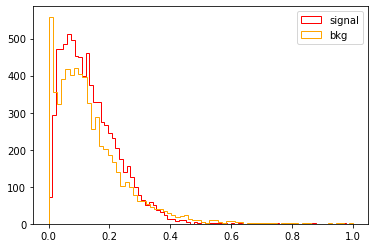

700GeV
lepton2_pt


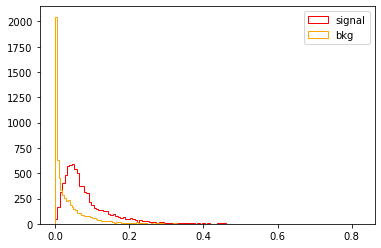

700GeV
lepton3_pt


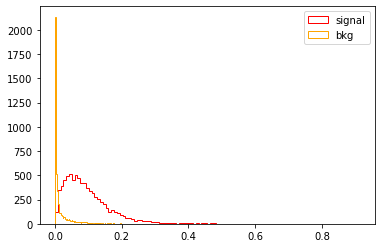

700GeV
lepton1_eta


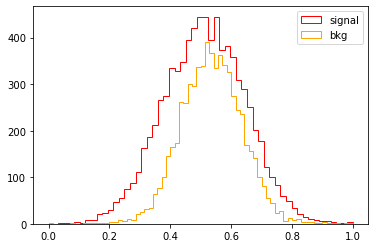

700GeV
lepton2_eta


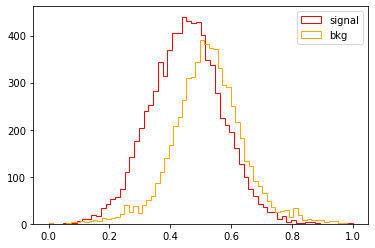

700GeV
lepton3_eta


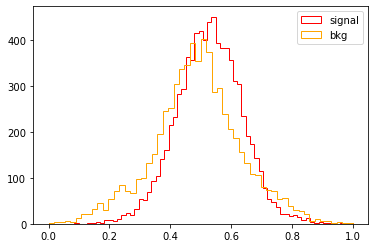

700GeV
lepton1_phi


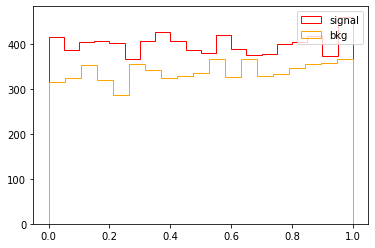

700GeV
lepton2_phi


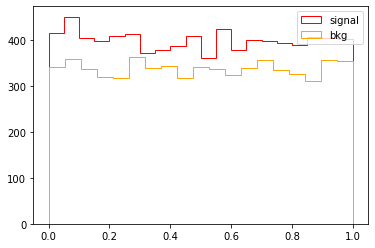

700GeV
lepton3_phi


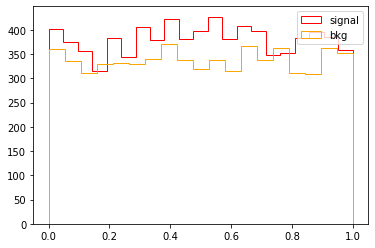

700GeV
MET


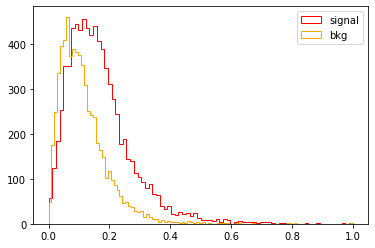

700GeV
MET_phi


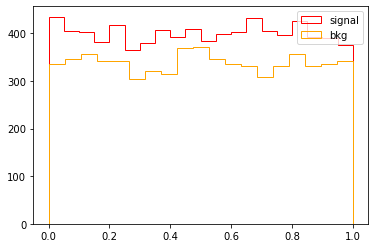

700GeV
lepton1_flavor


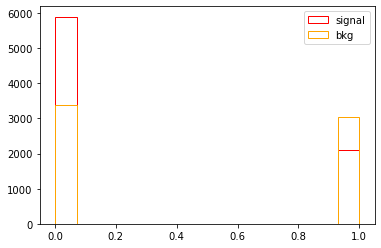

700GeV
lepton2_flavor


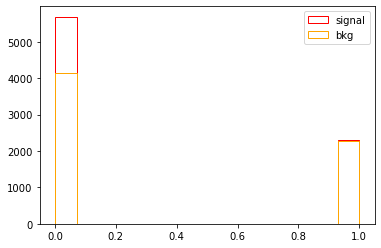

700GeV
lepton3_flavor


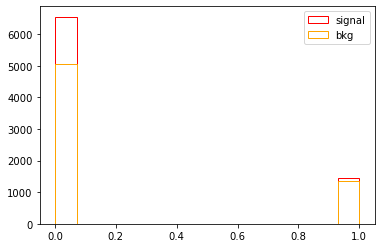

700GeV
lepton1_charge


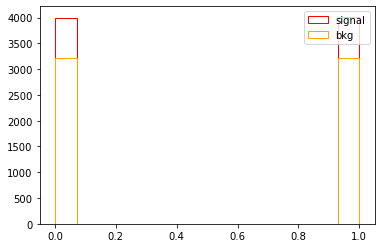

700GeV
lepton2_charge


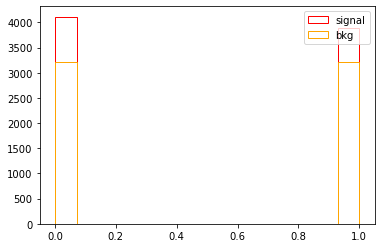

700GeV
lepton3_charge


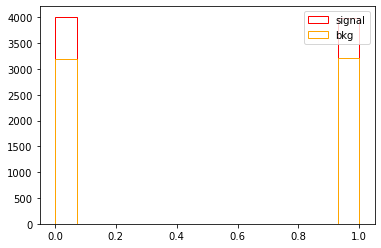

700GeV
signal


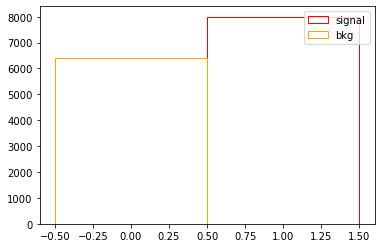

800GeV
lepton1_pt


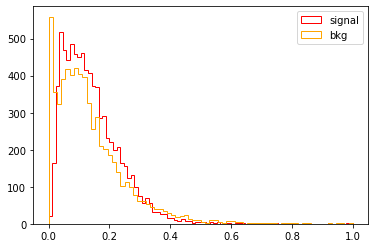

800GeV
lepton2_pt


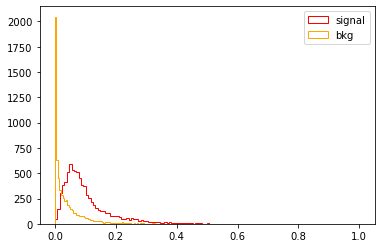

800GeV
lepton3_pt


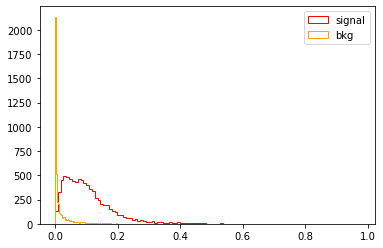

800GeV
lepton1_eta


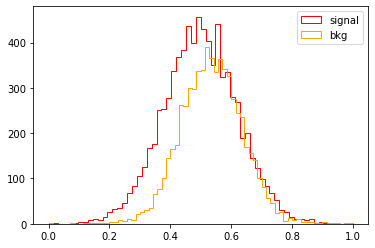

800GeV
lepton2_eta


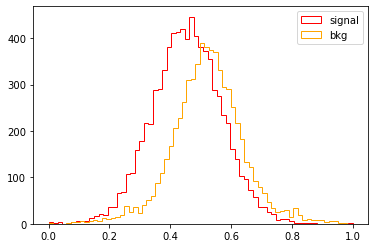

800GeV
lepton3_eta


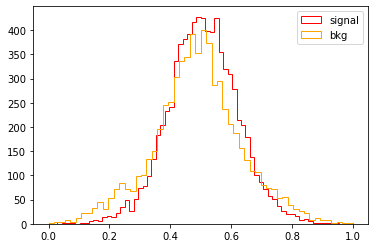

800GeV
lepton1_phi


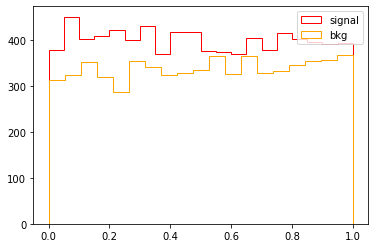

800GeV
lepton2_phi


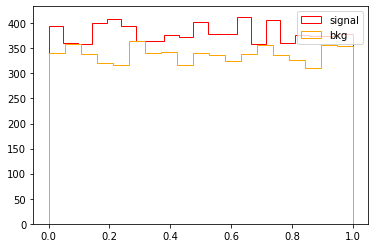

800GeV
lepton3_phi


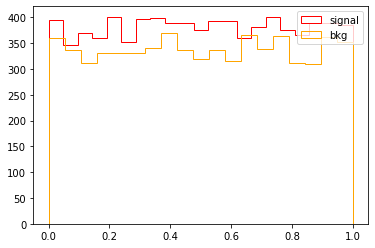

800GeV
MET


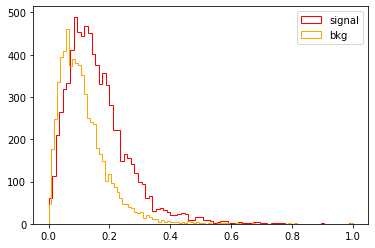

800GeV
MET_phi


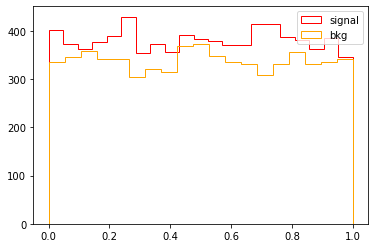

800GeV
lepton1_flavor


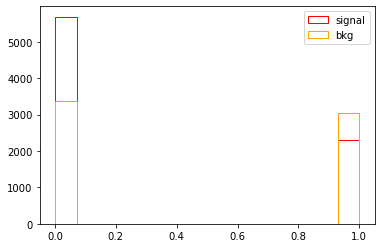

800GeV
lepton2_flavor


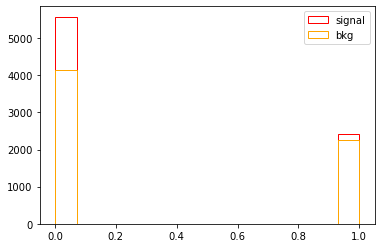

800GeV
lepton3_flavor


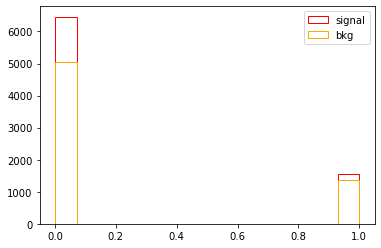

800GeV
lepton1_charge


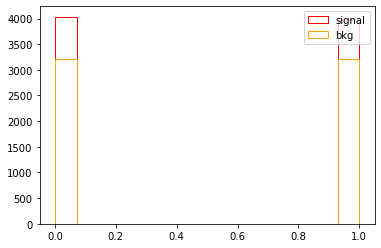

800GeV
lepton2_charge


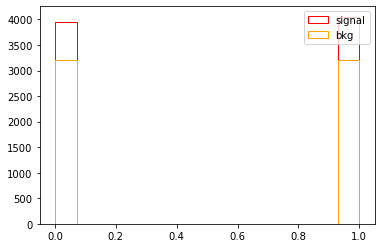

800GeV
lepton3_charge


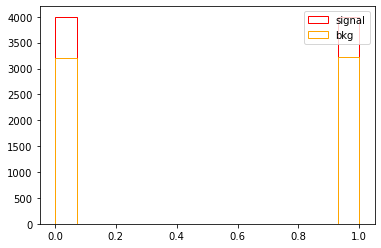

800GeV
signal


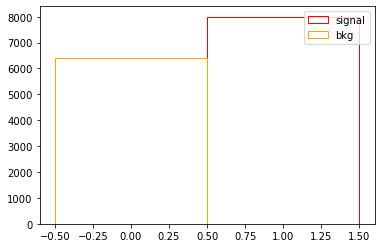

1000GeV
lepton1_pt


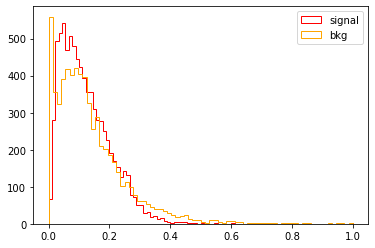

1000GeV
lepton2_pt


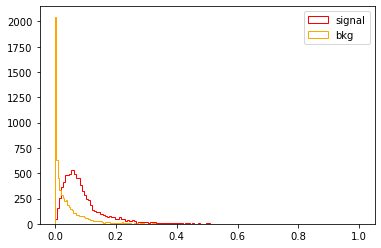

1000GeV
lepton3_pt


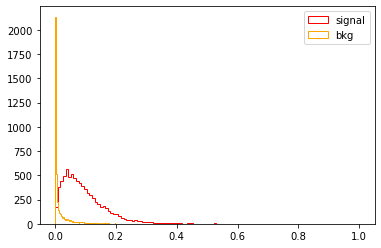

1000GeV
lepton1_eta


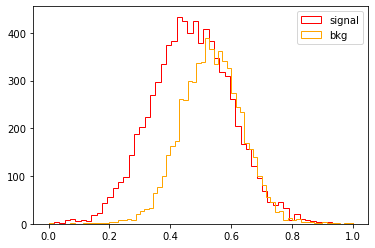

1000GeV
lepton2_eta


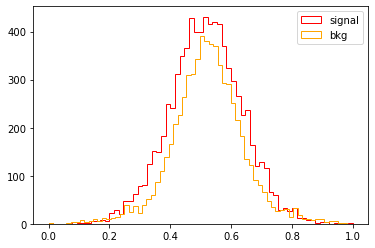

1000GeV
lepton3_eta


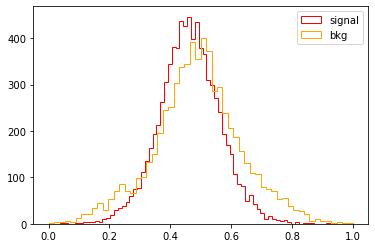

1000GeV
lepton1_phi


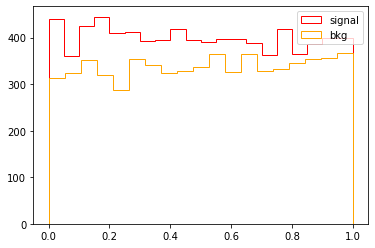

1000GeV
lepton2_phi


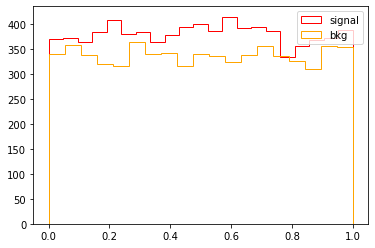

1000GeV
lepton3_phi


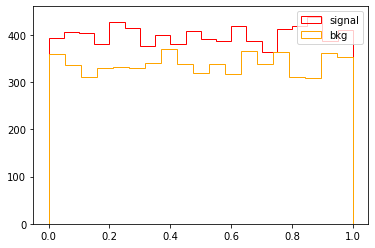

1000GeV
MET


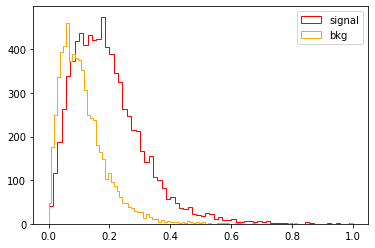

1000GeV
MET_phi


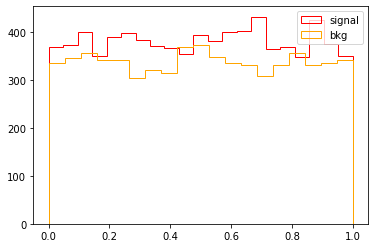

1000GeV
lepton1_flavor


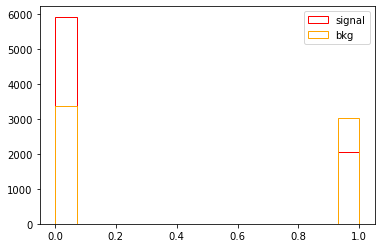

1000GeV
lepton2_flavor


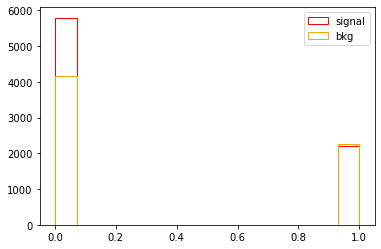

1000GeV
lepton3_flavor


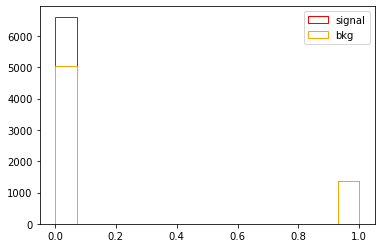

1000GeV
lepton1_charge


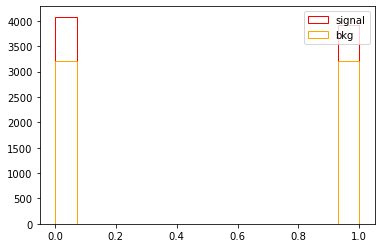

1000GeV
lepton2_charge


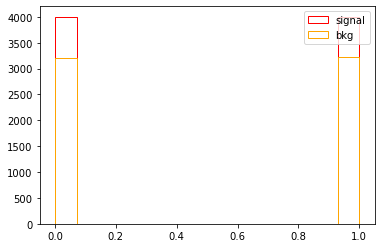

1000GeV
lepton3_charge


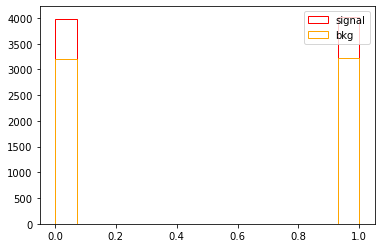

1000GeV
signal


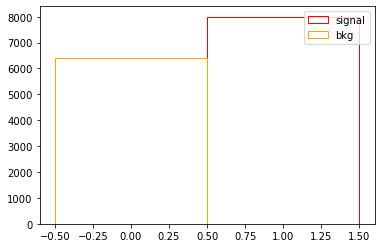

In [23]:
#Plot 80% of new df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[:n_sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

500GeV
lepton1_pt


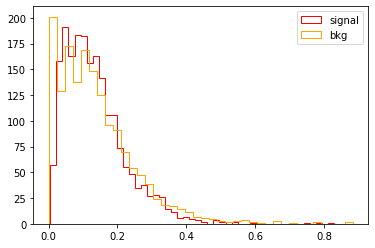

500GeV
lepton2_pt


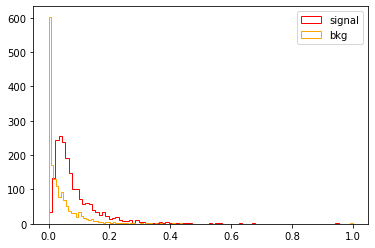

500GeV
lepton3_pt


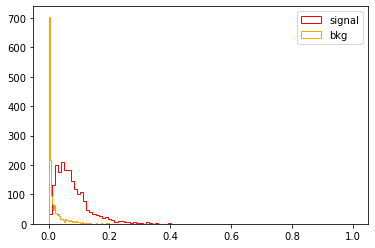

500GeV
lepton1_eta


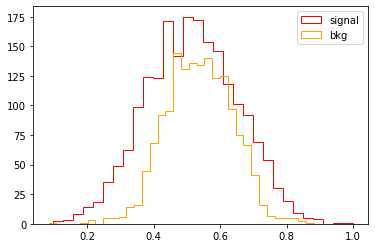

500GeV
lepton2_eta


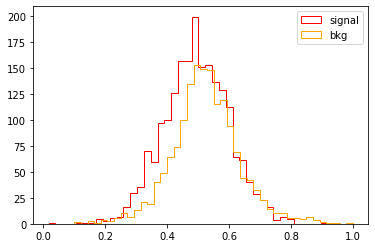

500GeV
lepton3_eta


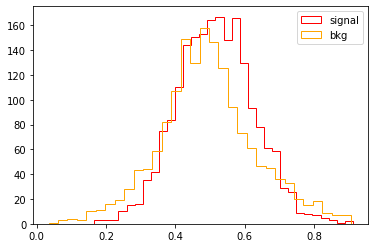

500GeV
lepton1_phi


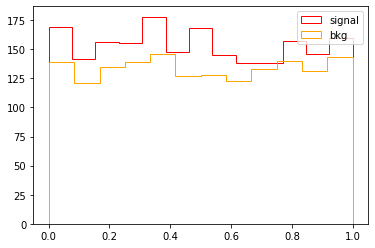

500GeV
lepton2_phi


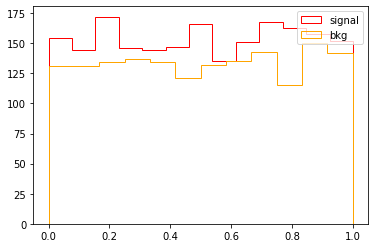

500GeV
lepton3_phi


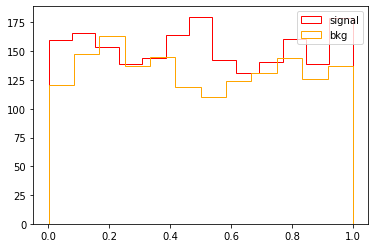

500GeV
MET


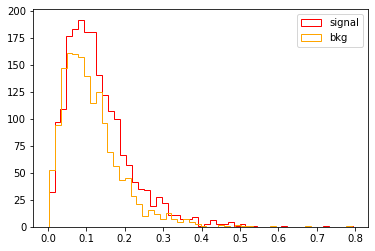

500GeV
MET_phi


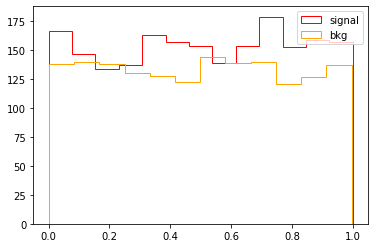

500GeV
lepton1_flavor


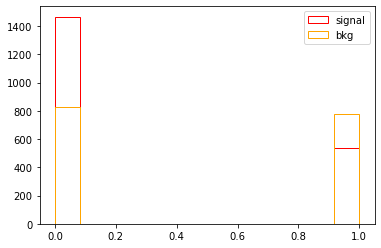

500GeV
lepton2_flavor


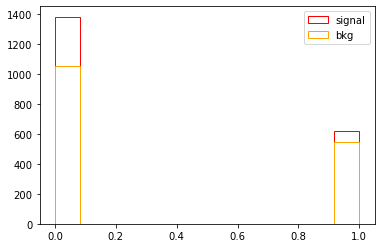

500GeV
lepton3_flavor


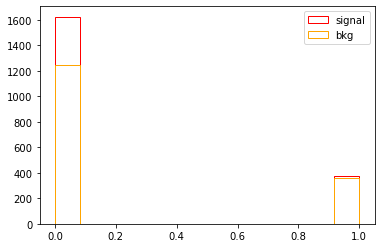

500GeV
lepton1_charge


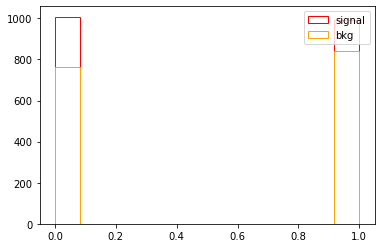

500GeV
lepton2_charge


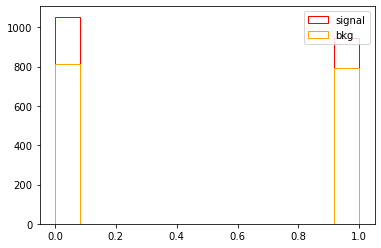

500GeV
lepton3_charge


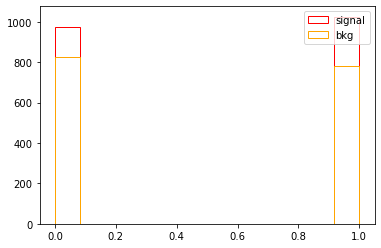

500GeV
signal


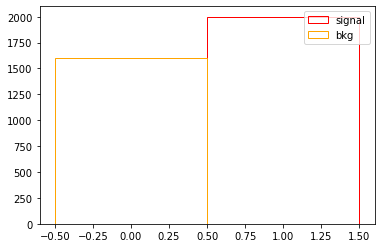

600GeV
lepton1_pt


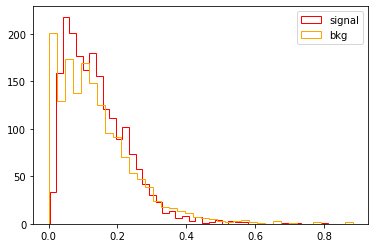

600GeV
lepton2_pt


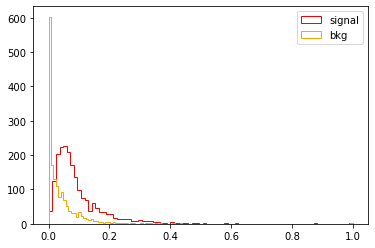

600GeV
lepton3_pt


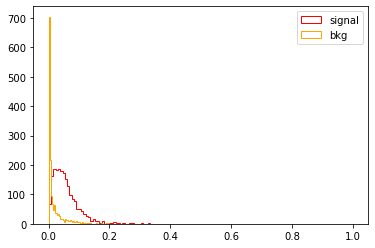

600GeV
lepton1_eta


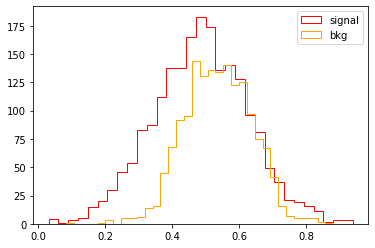

600GeV
lepton2_eta


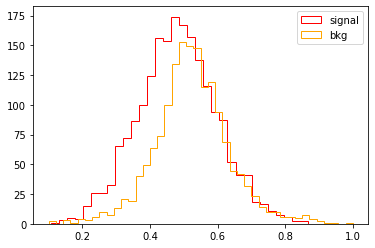

600GeV
lepton3_eta


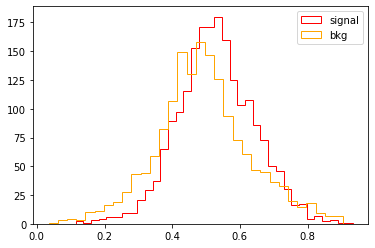

600GeV
lepton1_phi


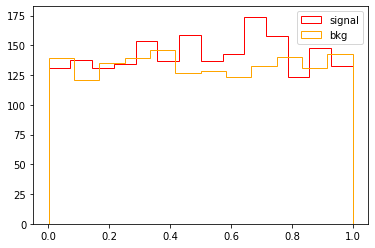

600GeV
lepton2_phi


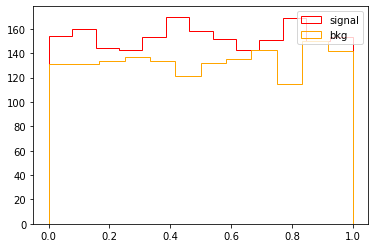

600GeV
lepton3_phi


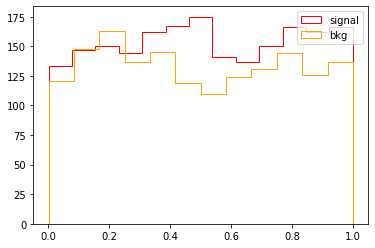

600GeV
MET


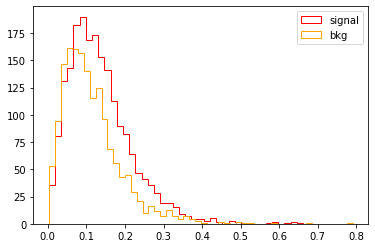

600GeV
MET_phi


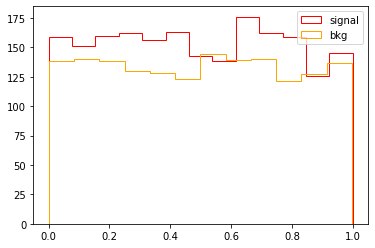

600GeV
lepton1_flavor


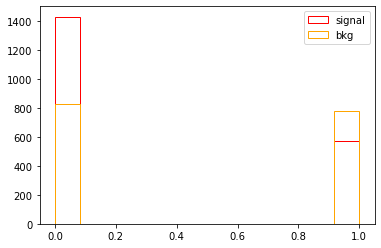

600GeV
lepton2_flavor


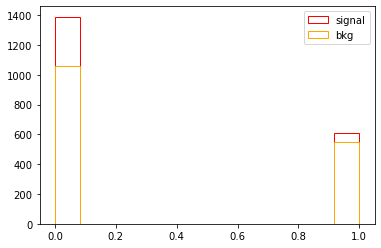

600GeV
lepton3_flavor


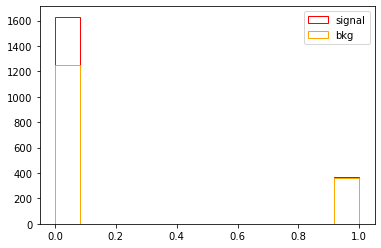

600GeV
lepton1_charge


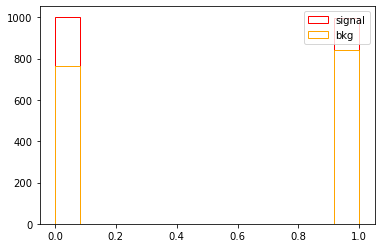

600GeV
lepton2_charge


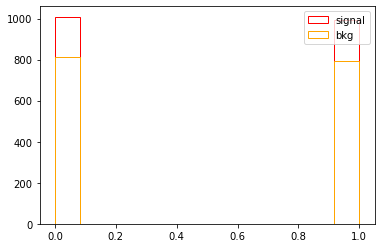

600GeV
lepton3_charge


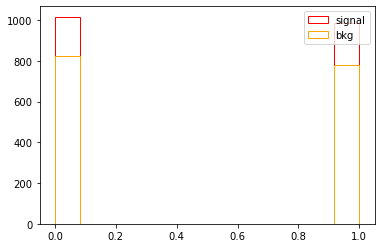

600GeV
signal


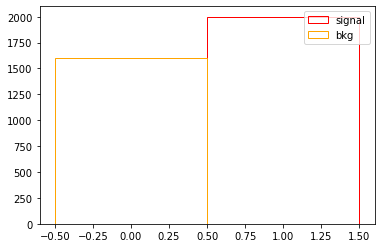

700GeV
lepton1_pt


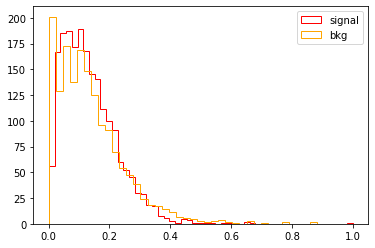

700GeV
lepton2_pt


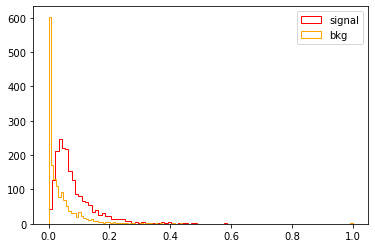

700GeV
lepton3_pt


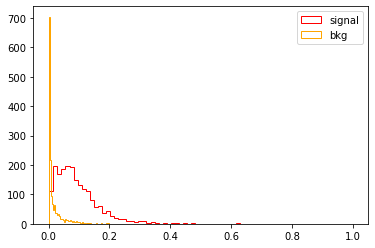

700GeV
lepton1_eta


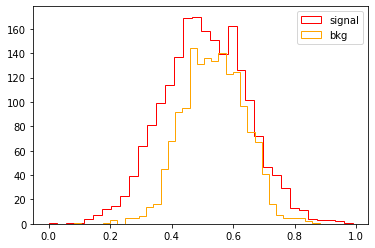

700GeV
lepton2_eta


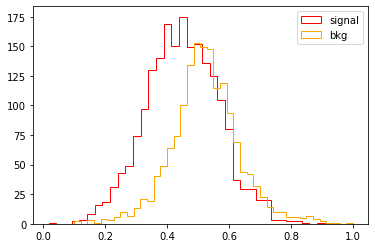

700GeV
lepton3_eta


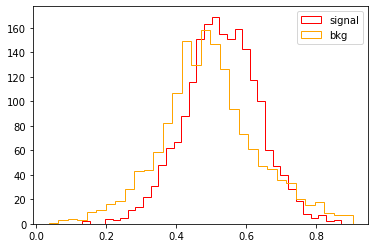

700GeV
lepton1_phi


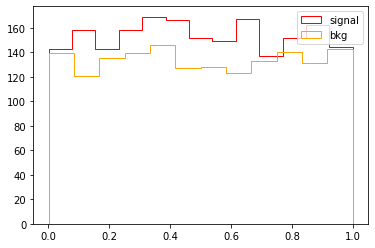

700GeV
lepton2_phi


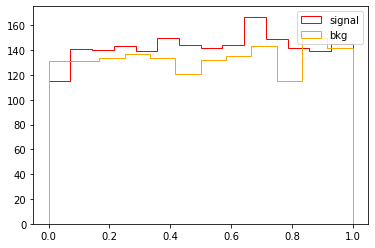

700GeV
lepton3_phi


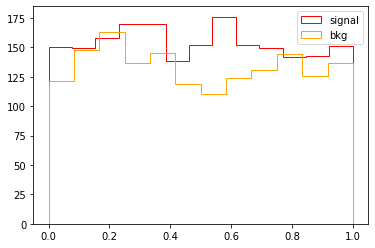

700GeV
MET


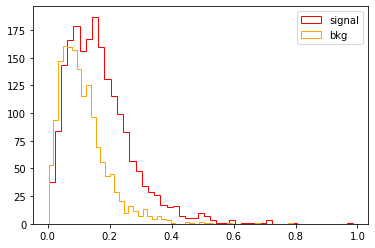

700GeV
MET_phi


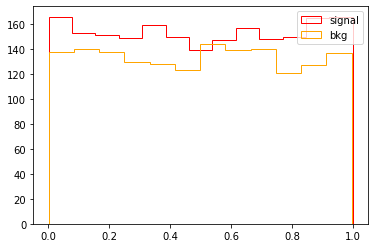

700GeV
lepton1_flavor


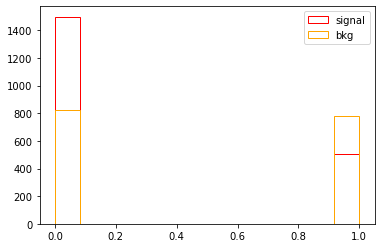

700GeV
lepton2_flavor


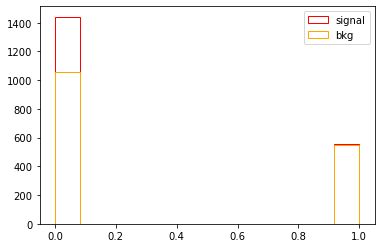

700GeV
lepton3_flavor


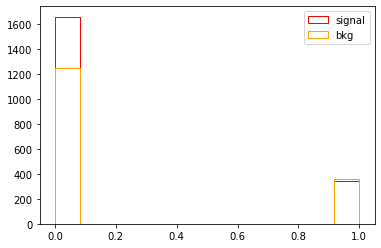

700GeV
lepton1_charge


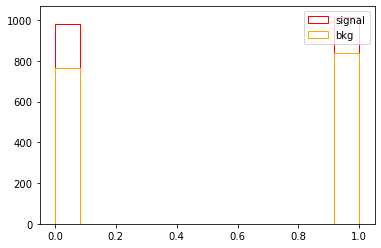

700GeV
lepton2_charge


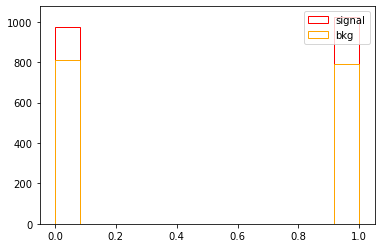

700GeV
lepton3_charge


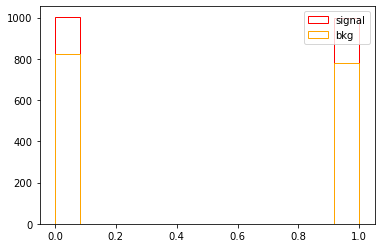

700GeV
signal


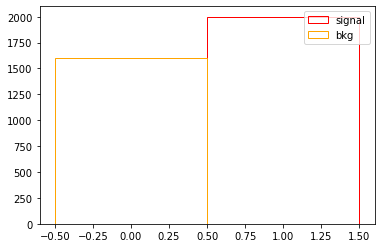

800GeV
lepton1_pt


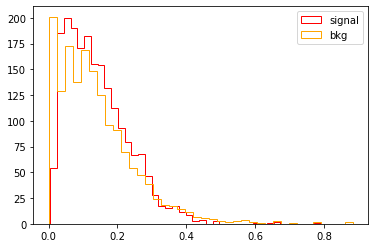

800GeV
lepton2_pt


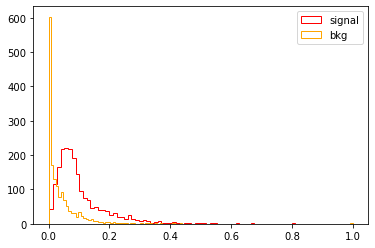

800GeV
lepton3_pt


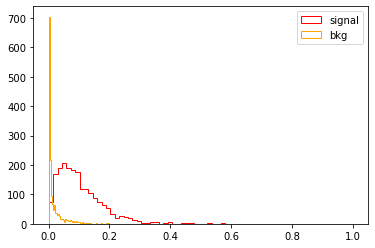

800GeV
lepton1_eta


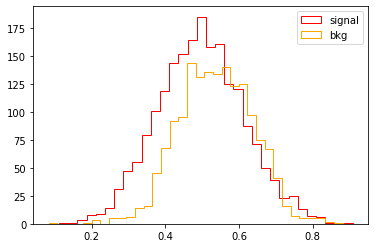

800GeV
lepton2_eta


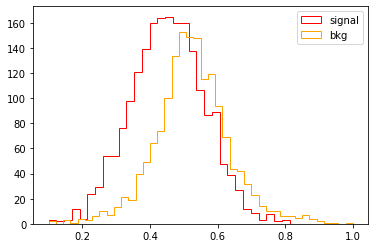

800GeV
lepton3_eta


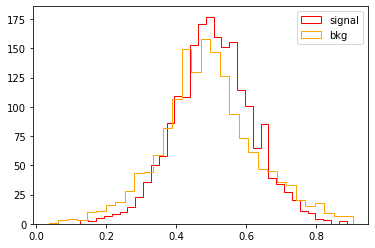

800GeV
lepton1_phi


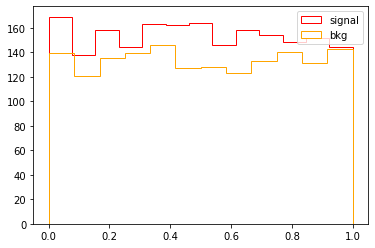

800GeV
lepton2_phi


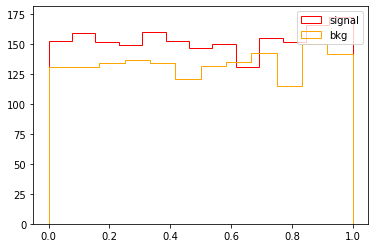

800GeV
lepton3_phi


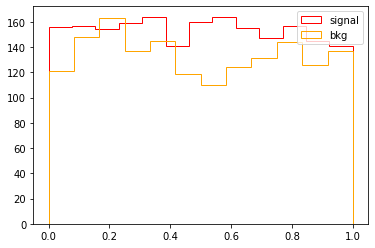

800GeV
MET


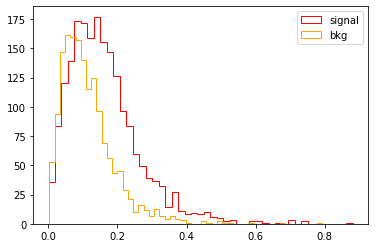

800GeV
MET_phi


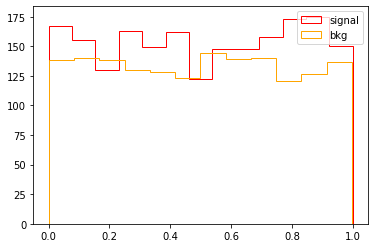

800GeV
lepton1_flavor


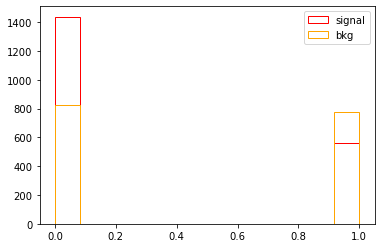

800GeV
lepton2_flavor


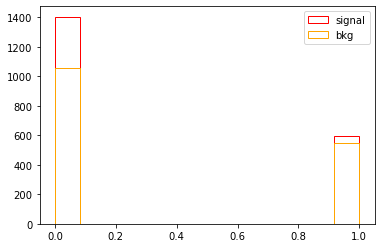

800GeV
lepton3_flavor


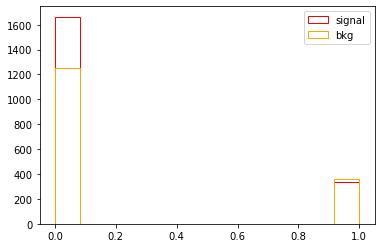

800GeV
lepton1_charge


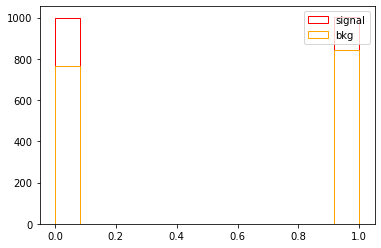

800GeV
lepton2_charge


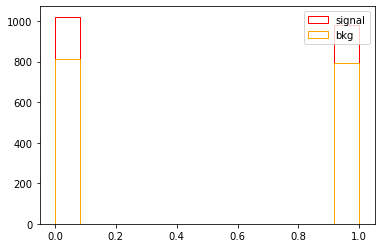

800GeV
lepton3_charge


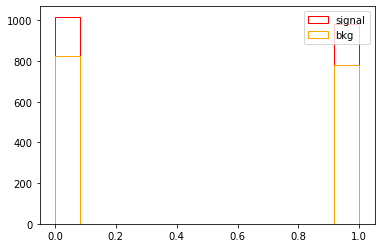

800GeV
signal


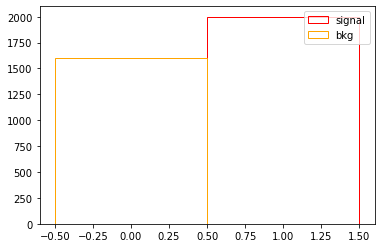

1000GeV
lepton1_pt


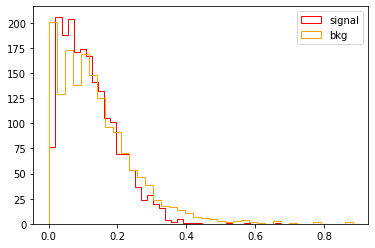

1000GeV
lepton2_pt


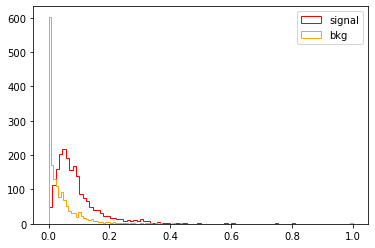

1000GeV
lepton3_pt


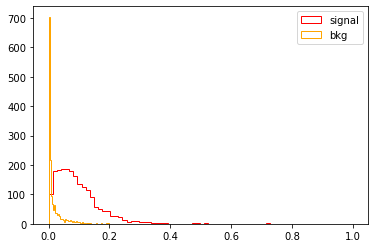

1000GeV
lepton1_eta


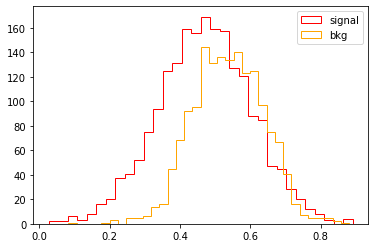

1000GeV
lepton2_eta


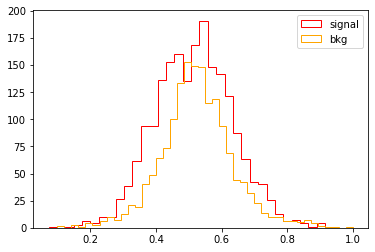

1000GeV
lepton3_eta


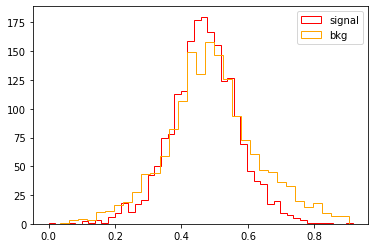

1000GeV
lepton1_phi


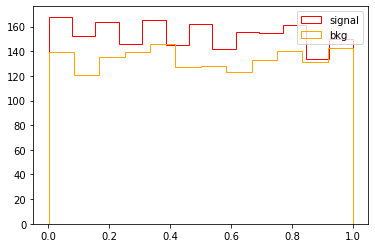

1000GeV
lepton2_phi


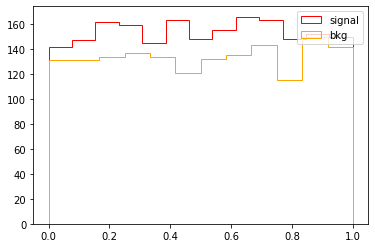

1000GeV
lepton3_phi


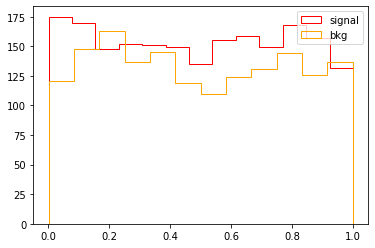

1000GeV
MET


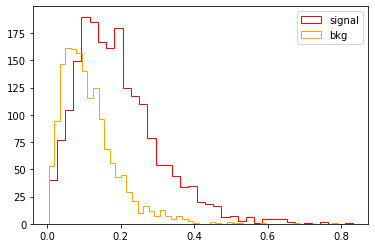

1000GeV
MET_phi


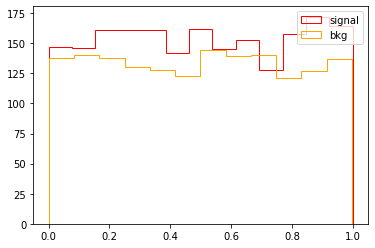

1000GeV
lepton1_flavor


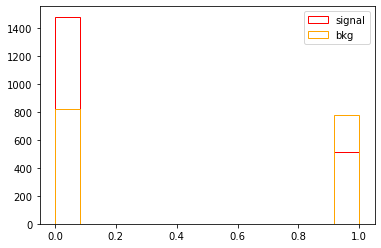

1000GeV
lepton2_flavor


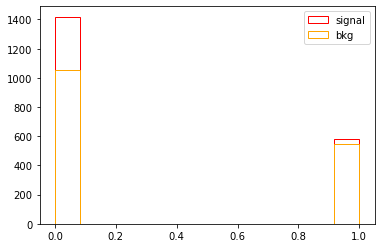

1000GeV
lepton3_flavor


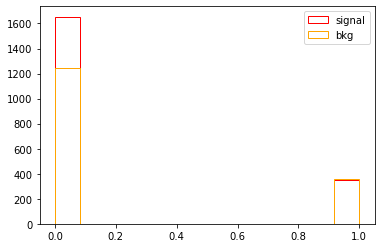

1000GeV
lepton1_charge


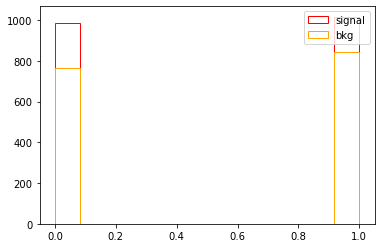

1000GeV
lepton2_charge


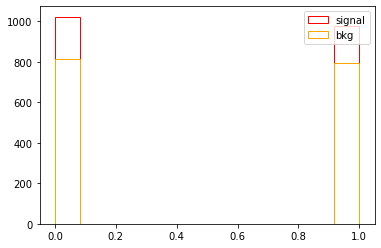

1000GeV
lepton3_charge


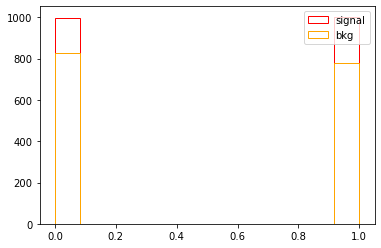

1000GeV
signal


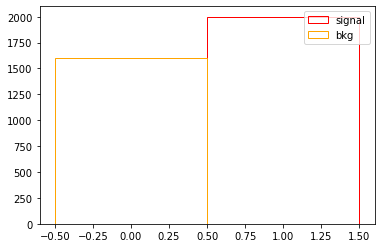

In [24]:
#Plot other 20% of df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[n_sig:][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[n_bkg:][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [25]:
for sig in range(len(x_train)):
    print (mass_points[sig])
    print (np.shape(x_train[sig]))
    print (np.shape(y_test[sig]))

500GeV
(14419, 17)
(3605,)
600GeV
(14419, 17)
(3605,)
700GeV
(14419, 17)
(3605,)
800GeV
(14419, 17)
(3605,)
1000GeV
(14419, 17)
(3605,)


In [26]:
x_train[0]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.008266,0.005632,0.003025,0.483794,0.428299,0.499310,0.439470,0.658180,0.201371,0.103421,0.127177,0.0,1.0,0.0,1.0,1.0,0.0
1,0.093095,0.076811,0.145435,0.591820,0.347425,0.418061,0.531527,0.963255,0.732597,0.223091,0.764560,1.0,0.0,0.0,0.0,0.0,1.0
2,0.163750,0.082634,0.113223,0.568311,0.599866,0.512097,0.124667,0.028024,0.567752,0.150565,0.503813,1.0,1.0,0.0,0.0,0.0,1.0
3,0.325283,0.018131,0.003106,0.594906,0.517430,0.443927,0.483308,0.020046,0.657940,0.138140,0.368713,1.0,1.0,0.0,1.0,1.0,0.0
4,0.437098,0.020994,0.009688,0.442075,0.407074,0.428530,0.277569,0.948589,0.031085,0.139050,0.196451,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,0.041341,0.026781,0.045611,0.420940,0.512201,0.862117,0.821059,0.098467,0.640640,0.095994,0.124057,0.0,0.0,1.0,1.0,0.0,1.0
14415,0.201094,0.068138,0.076066,0.431995,0.469088,0.529368,0.788562,0.680017,0.318047,0.037241,0.769764,1.0,1.0,0.0,0.0,1.0,1.0
14416,0.092809,0.104095,0.092762,0.687479,0.553208,0.413651,0.261811,0.624695,0.448610,0.392126,0.700497,0.0,0.0,1.0,1.0,0.0,1.0
14417,0.047987,0.016647,0.019109,0.552107,0.568778,0.567549,0.358235,0.209157,0.924683,0.050409,0.886708,0.0,1.0,1.0,1.0,1.0,0.0


In [27]:
x_train[1]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.038685,0.034544,0.042204,0.797822,0.769600,0.527859,0.061138,0.622156,0.107934,0.025685,0.285984,0.0,0.0,0.0,1.0,0.0,0.0
1,0.063642,0.001646,0.001095,0.456318,0.298897,0.269652,0.551051,0.165611,0.167022,0.100828,0.060151,1.0,0.0,0.0,0.0,1.0,0.0
2,0.046355,0.059240,0.035510,0.543231,0.451339,0.608299,0.455576,0.919537,0.270572,0.232806,0.200246,1.0,1.0,0.0,0.0,1.0,0.0
3,0.169698,0.096700,0.058249,0.357763,0.442913,0.601948,0.074009,0.058482,0.791505,0.086885,0.893807,1.0,1.0,0.0,0.0,1.0,1.0
4,0.052708,0.090547,0.039781,0.310254,0.568123,0.492538,0.376825,0.098270,0.341012,0.127263,0.549806,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,0.057095,0.001943,0.000179,0.302595,0.777374,0.377940,0.949980,0.696481,0.017398,0.154583,0.617998,1.0,0.0,0.0,1.0,0.0,0.0
14415,0.217047,0.000937,0.000522,0.566414,0.530050,0.497385,0.727724,0.390518,0.389756,0.201552,0.812565,1.0,0.0,0.0,1.0,0.0,1.0
14416,0.055036,0.000492,0.000921,0.436772,0.489258,0.461449,0.541904,0.197850,0.140714,0.087203,0.558398,0.0,0.0,0.0,0.0,0.0,1.0
14417,0.202562,0.249023,0.079859,0.523304,0.529021,0.532096,0.881284,0.969867,0.420104,0.040023,0.269811,1.0,1.0,0.0,0.0,1.0,0.0


In [28]:
x_train[2]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.118130,0.022906,0.046477,0.448167,0.317567,0.347251,0.855286,0.763365,0.287042,0.359148,0.910547,0.0,0.0,0.0,0.0,1.0,1.0
1,0.071823,0.127408,0.083729,0.590746,0.608688,0.433125,0.993718,0.967352,0.410880,0.174169,0.262622,1.0,1.0,0.0,0.0,1.0,1.0
2,0.029805,0.007293,0.001744,0.523770,0.512135,0.290904,0.924146,0.405959,0.514205,0.155464,0.289333,1.0,0.0,0.0,1.0,1.0,1.0
3,0.117036,0.003375,0.006049,0.485118,0.525373,0.428869,0.397859,0.545561,0.563620,0.123083,0.689984,0.0,0.0,0.0,0.0,1.0,0.0
4,0.058223,0.088765,0.088395,0.813904,0.182679,0.581606,0.337448,0.316346,0.866187,0.088771,0.985139,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,0.058614,0.037614,0.018852,0.502915,0.491042,0.294010,0.690860,0.285064,0.943966,0.152292,0.191549,1.0,0.0,0.0,1.0,0.0,1.0
14415,0.115976,0.055941,0.094609,0.417763,0.555659,0.425129,0.397003,0.092454,0.341743,0.114177,0.463220,0.0,1.0,0.0,1.0,1.0,0.0
14416,0.020028,0.048238,0.100879,0.591165,0.600458,0.495393,0.564518,0.498695,0.958982,0.089245,0.812304,0.0,0.0,0.0,1.0,1.0,0.0
14417,0.239228,0.076866,0.063081,0.500064,0.626223,0.475126,0.683322,0.372675,0.561815,0.199076,0.121680,0.0,1.0,0.0,1.0,1.0,0.0


In [29]:
x_train[3]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.067421,0.066696,0.005948,0.554180,0.513939,0.353018,0.895700,0.528869,0.203269,0.083962,0.984934,0.0,0.0,0.0,0.0,0.0,0.0
1,0.036659,0.001157,0.002593,0.357988,0.299148,0.458224,0.574324,0.492320,0.580032,0.221718,0.085205,1.0,0.0,0.0,1.0,1.0,0.0
2,0.042886,0.092162,0.111281,0.438319,0.430560,0.656221,0.339350,0.551617,0.008081,0.093848,0.587868,0.0,0.0,0.0,1.0,0.0,0.0
3,0.115632,0.178969,0.313370,0.396827,0.373527,0.502993,0.506861,0.520135,0.934895,0.419402,0.899076,1.0,1.0,0.0,1.0,0.0,1.0
4,0.112771,0.038245,0.034532,0.498214,0.487928,0.576864,0.156177,0.289535,0.621599,0.076587,0.889100,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,0.046240,0.096056,0.049658,0.313261,0.264734,0.295155,0.520448,0.384235,0.777264,0.077332,0.453898,0.0,0.0,0.0,0.0,1.0,0.0
14415,0.153180,0.216646,0.194756,0.582993,0.433591,0.464421,0.446368,0.668042,0.908515,0.103213,0.055016,0.0,1.0,1.0,0.0,0.0,1.0
14416,0.276604,0.147946,0.130451,0.732290,0.501266,0.669424,0.184516,0.662307,0.197584,0.216797,0.211668,0.0,1.0,0.0,1.0,1.0,0.0
14417,0.049957,0.039919,0.001269,0.462893,0.581408,0.583398,0.926389,0.616761,0.612394,0.070999,0.671357,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
x_train[4]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.144627,0.042535,0.019448,0.630946,0.594164,0.553736,0.650523,0.299846,0.292007,0.086044,0.174816,1.0,1.0,0.0,0.0,0.0,1.0
1,0.173159,0.002626,0.003335,0.407649,0.687902,0.649674,0.438975,0.211188,0.210224,0.106428,0.294941,0.0,0.0,0.0,1.0,0.0,1.0
2,0.089459,0.037128,0.005378,0.616057,0.581402,0.525261,0.970159,0.404962,0.693826,0.054718,0.351476,0.0,0.0,0.0,1.0,1.0,1.0
3,0.159487,0.330872,0.137968,0.412244,0.504627,0.640607,0.390966,0.765476,0.354122,0.172939,0.990900,0.0,0.0,1.0,0.0,1.0,1.0
4,0.200201,0.137646,0.076781,0.578699,0.548318,0.487421,0.714582,0.182441,0.728032,0.356982,0.180372,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,0.192479,0.088451,0.099647,0.447529,0.541482,0.534089,0.066801,0.029142,0.567219,0.119468,0.622715,0.0,0.0,0.0,1.0,0.0,1.0
14415,0.083118,0.047129,0.092125,0.219604,0.370242,0.208290,0.108182,0.165735,0.505609,0.154096,0.573817,0.0,0.0,1.0,1.0,0.0,1.0
14416,0.224931,0.050757,0.058154,0.511386,0.344083,0.204700,0.804426,0.007479,0.907193,0.374911,0.903557,0.0,0.0,0.0,1.0,1.0,1.0
14417,0.084930,0.031432,0.063522,0.706190,0.696774,0.392912,0.857179,0.758473,0.348703,0.214223,0.632092,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"

In [32]:
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

#Defining sequential or linearly stack layers as model
#Adding 5 dense layers to network
model_500 = Sequential()
model_500.add(Dense(17, input_dim=x_train[0].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_500.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_500.add(Dropout(0.5))
model_500.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_500.add(Dropout(0.5))
model_500.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_500.add(Dropout(0.5))
model_500.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [33]:
model_600 = Sequential()
model_600.add(Dense(17, input_dim=x_train[1].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_600.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_600.add(Dropout(0.5))
model_600.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_600.add(Dropout(0.5))
model_600.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_600.add(Dropout(0.5))
model_600.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [34]:
model_700 = Sequential()
model_700.add(Dense(17, input_dim=x_train[2].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_700.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_700.add(Dropout(0.5))
model_700.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_700.add(Dropout(0.5))
model_700.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_700.add(Dropout(0.5))
model_700.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [35]:
model_800 = Sequential()
model_800.add(Dense(17, input_dim=x_train[3].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_800.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_800.add(Dropout(0.5))
model_800.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_800.add(Dropout(0.5))
model_800.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_800.add(Dropout(0.5))
model_800.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [36]:
model_1000 = Sequential()
model_1000.add(Dense(17, input_dim=x_train[4].shape[1], kernel_initializer="random_uniform", activation='tanh'))
model_1000.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_1000.add(Dropout(0.5))
model_1000.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model_1000.add(Dropout(0.5))
model_1000.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model_1000.add(Dropout(0.5))
model_1000.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [37]:
model = [model_500,model_600,model_700,model_800,model_1000]

In [38]:
for mod in range(len(model)):
    model[mod].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model[mod].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [39]:
history = ['history_500','history_600','history_700','history_800','history_1000']

In [40]:
for his in range(len(history)):
    print (mass_points[his])
    history[his] = model[his].fit(x_train[his].values,y_train[his].values,validation_data=(x_test[his].values,y_test[his].values), epochs=30, batch_size=128)

500GeV
Epoch 1/30
113/113 [==============================] - 1s 5ms/step - loss: 0.6845 - accuracy: 0.5539 - val_loss: 0.6625 - val_accuracy: 0.5548
Epoch 2/30
113/113 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.6639 - val_loss: 0.5253 - val_accuracy: 0.8008
Epoch 3/30
113/113 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.8108 - val_loss: 0.4184 - val_accuracy: 0.8358
Epoch 4/30
113/113 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8307 - val_loss: 0.3974 - val_accuracy: 0.8449
Epoch 5/30
113/113 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8412 - val_loss: 0.3999 - val_accuracy: 0.8402
Epoch 6/30
113/113 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8444 - val_loss: 0.3676 - val_accuracy: 0.8541
Epoch 7/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8476 - val_loss: 0.3676 - val_accuracy: 0.8563

113/113 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8831 - val_loss: 0.2841 - val_accuracy: 0.8857
Epoch 26/30
113/113 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8838 - val_loss: 0.2819 - val_accuracy: 0.8871
Epoch 27/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.8818 - val_loss: 0.2771 - val_accuracy: 0.8918
Epoch 28/30
113/113 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8822 - val_loss: 0.2735 - val_accuracy: 0.8915
Epoch 29/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.8839 - val_loss: 0.2709 - val_accuracy: 0.8904
Epoch 30/30
113/113 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8827 - val_loss: 0.2713 - val_accuracy: 0.8918
1000GeV
Epoch 1/30
113/113 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5531 - val_loss: 0.6212 - val_accuracy: 0.5548
Epoc

In [41]:
for mod in range(len(model)):
    print (mass_points[mod])
    model[mod].metrics_names
    model[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV
113/113 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8807
600GeV
113/113 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8516
700GeV
113/113 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8896
800GeV
113/113 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8918
1000GeV
113/113 [==============================] - 0s 998us/step - loss: 0.2955 - accuracy: 0.8763


In [42]:
y_predict = ['y_predict_500','y_predict_600','y_predict_700','y_predict_800','y_predict_1000']
Classifier_testing_B = ['Classifier_testing_B500','Classifier_testing_B600','Classifier_testing_B700','Classifier_testing_B800','Classifier_testing_B1000']
Classifier_testing_S = ['Classifier_testing_S500','Classifier_testing_S600','Classifier_testing_S700','Classifier_testing_S800','Classifier_testing_S1000']

In [43]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values, batch_size=32)

500GeV
7999.0
2000.0
[1. 1. 1. ... 0. 0. 0.]


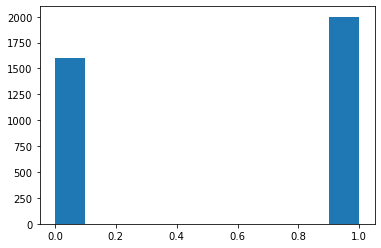

600GeV
7999.0
2000.0
[0. 0. 1. ... 0. 0. 1.]


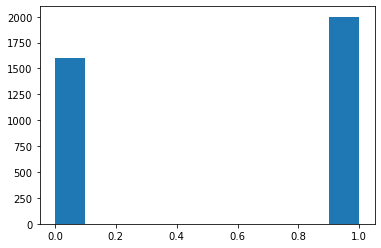

700GeV
7999.0
2000.0
[1. 1. 0. ... 1. 0. 1.]


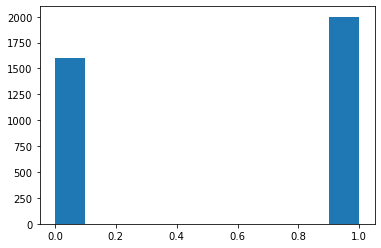

800GeV
7999.0
2000.0
[0. 1. 0. ... 0. 0. 1.]


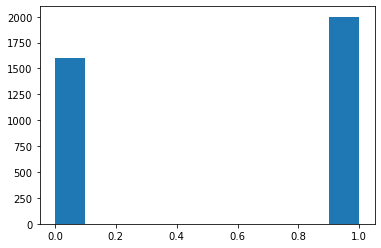

1000GeV
7999.0
2000.0
[1. 1. 0. ... 0. 1. 1.]


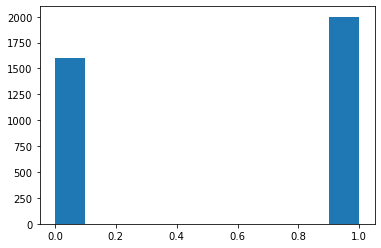

In [44]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    print (y_train[y].sum())
    print (y_test[y].sum())

    plt.figure()
    print (y_test[y].values)
    plt.hist(y_test[y])
    plt.show()

In [45]:
for mod in range(len(model)):
    y_predict[mod] = model[mod].predict(x_test[mod].values).ravel()
    Classifier_testing_S[mod] = model[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testing_B[mod] = model[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

500GeV
[4.5913744e-01 9.2798948e-01 9.8986173e-01 ... 8.8557696e-01 5.9804320e-04
 8.0148000e-01]


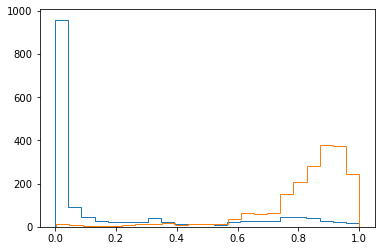

600GeV
[0.11849624 0.00675711 0.8235137  ... 0.03339219 0.33233404 0.8029268 ]


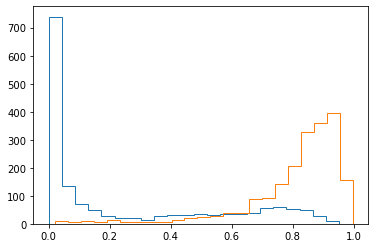

700GeV
[0.97150505 0.4861145  0.01187888 ... 0.5613186  0.00430268 0.99235785]


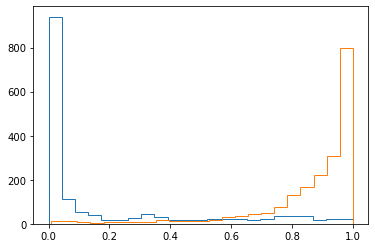

800GeV
[0.82356906 0.8792423  0.28862968 ... 0.03996983 0.71463764 0.9248361 ]


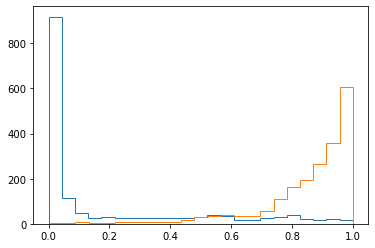

1000GeV
[0.9941906  0.83244044 0.12871858 ... 0.06206474 0.4788959  0.9263562 ]


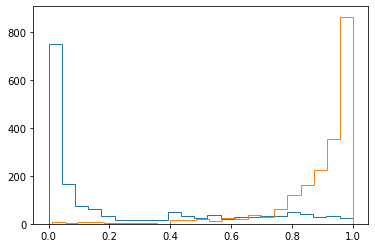

In [46]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=23,histtype="step",stacked=True)
    plt.hist(Classifier_testing_S[y],bins=23,histtype="step",stacked=True)
    plt.show()

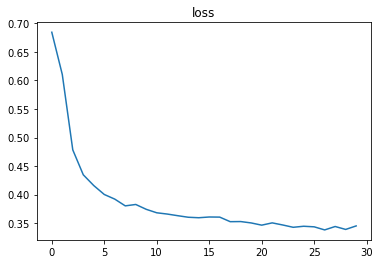

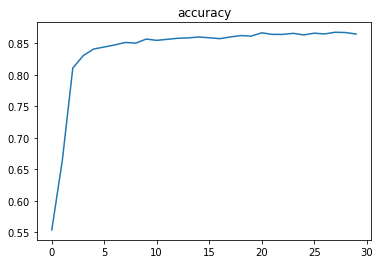

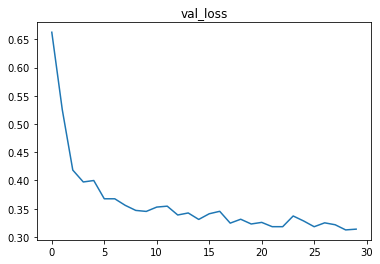

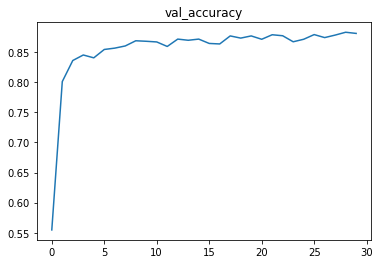

In [47]:
for u in history[0].history:
    plt.figure()
    plt.plot(history[0].history[u])
    plt.title(u)
plt.show()

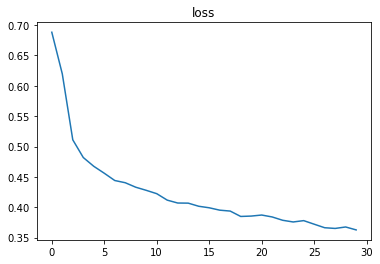

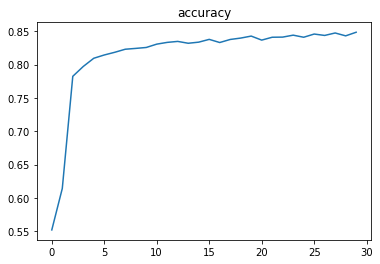

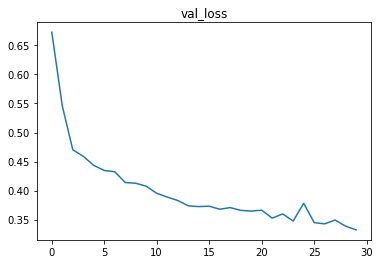

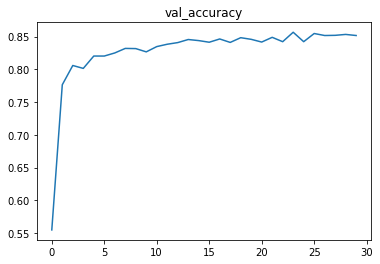

In [48]:
for u in history[1].history:
    plt.figure()
    plt.plot(history[1].history[u])
    plt.title(u)
plt.show()

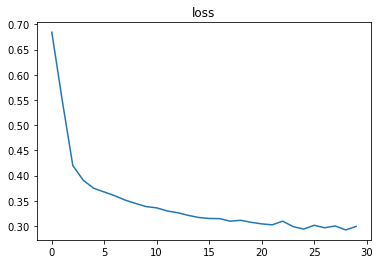

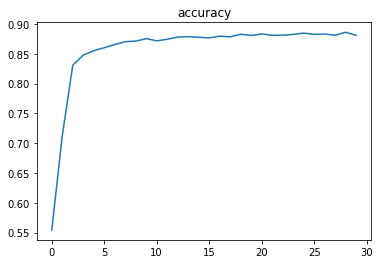

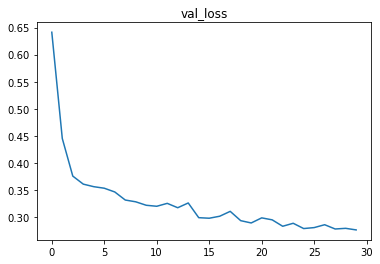

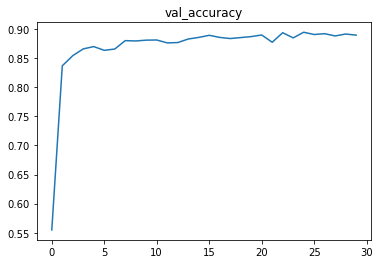

In [49]:
for u in history[2].history:
    plt.figure()
    plt.plot(history[2].history[u])
    plt.title(u)
plt.show()

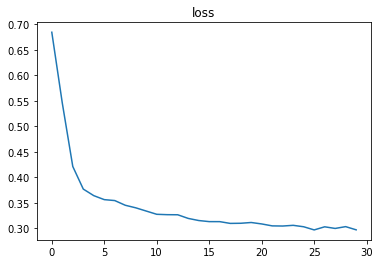

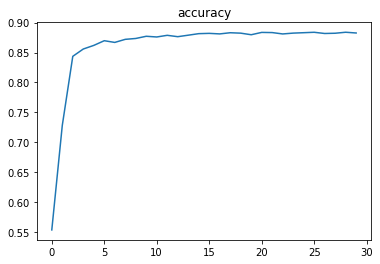

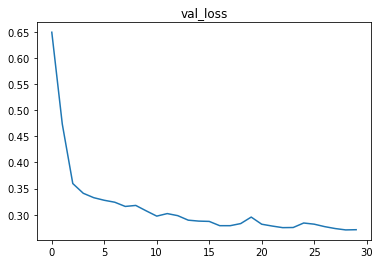

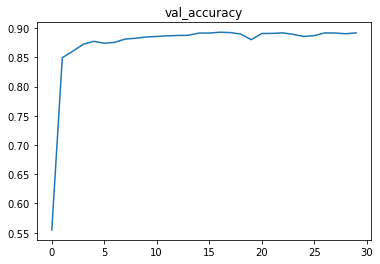

In [50]:
for u in history[3].history:
    plt.figure()
    plt.plot(history[3].history[u])
    plt.title(u)
plt.show()

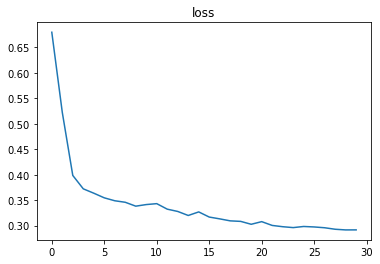

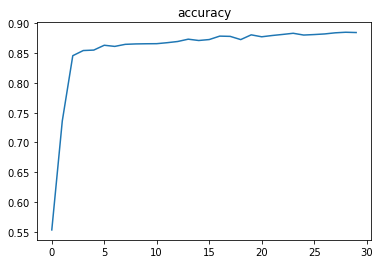

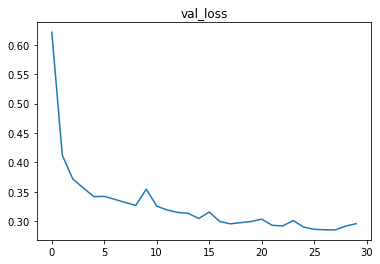

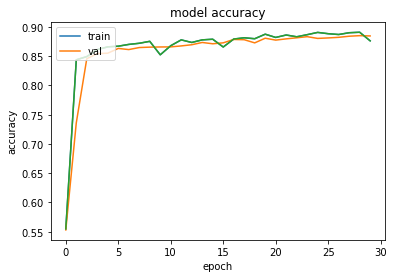

In [51]:
for u in history[4].history:
    plt.figure()
    plt.plot(history[4].history[u])
    plt.title(u)
plt.plot(history[4].history['accuracy'])
plt.plot(history[4].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
fpr_keras = ['fpr_keras_500','fpr_keras_600','fpr_keras_700','fpr_keras_800','fpr_keras_1000']
tpr_keras = ['tpr_keras_500','tpr_keras_600','tpr_keras_700','tpr_keras_800','tpr_keras_1000']
fnr_keras = ['fnr_keras_500','fnr_keras_600','fnr_keras_700','fnr_keras_800','fnr_keras_1000']
precision = ['precision_500','precision_600','precision_700','precision_800','precision_1000']
recall = ['recall_500','recall_600','recall_700','recall_800','recall_1000']
auc_model = ['auc_model_500','auc_model_600','auc_model_700','auc_model_800','auc_model_1000']
auc_model_rve = ['auc_model_rve_500','auc_model_rve_600','auc_model_rve_700','auc_model_rve_800','auc_model_rve_1000']
thresholds_keras = ['thresholds_keras_500','thresholds_keras_600','thresholds_keras_700','thresholds_keras_800','thresholds_keras_1000']

In [53]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import det_curve

for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values).ravel()

    fpr_keras[y], tpr_keras[y], thresholds_keras[y] = roc_curve(y_test[y], y_predict[y])

    auc_model[y] = auc(tpr_keras[y], (1-fpr_keras[y]))

500GeV


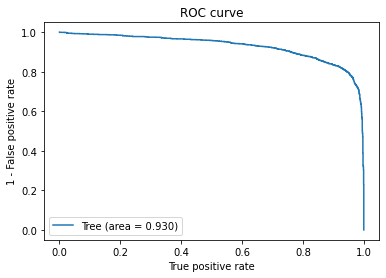

600GeV


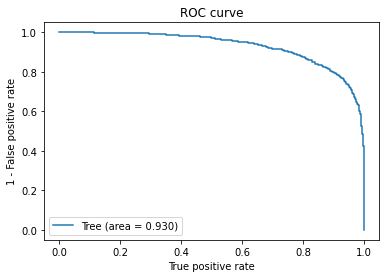

700GeV


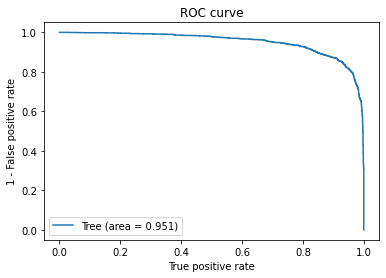

800GeV


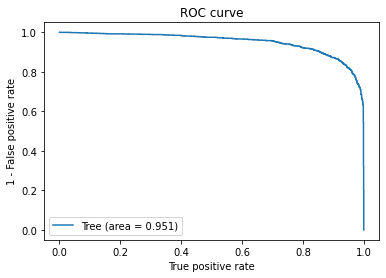

1000GeV


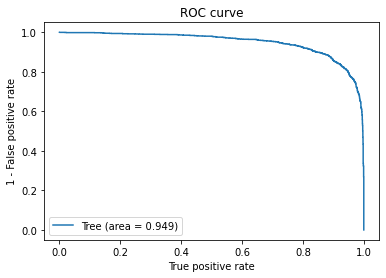

In [54]:
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tpr_keras[a], 1-fpr_keras[a], label='Tree (area = {:.3f})'.format(auc_model[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


500GeV


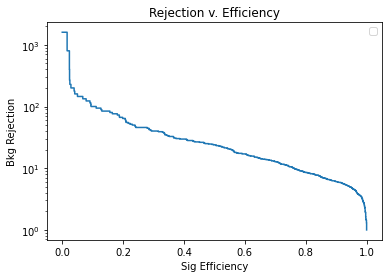

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


600GeV


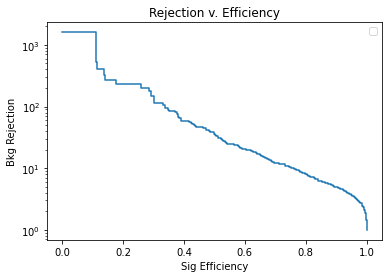

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


700GeV


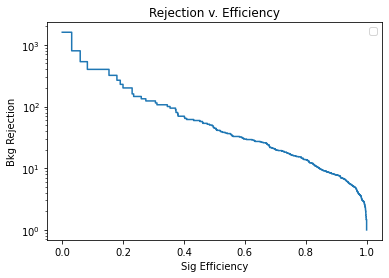

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


800GeV


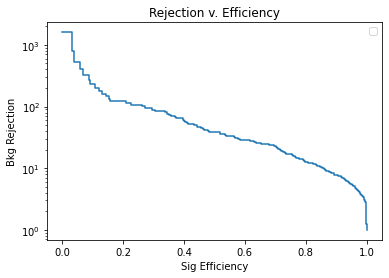

<ipython-input-55-871a9076145e>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


1000GeV


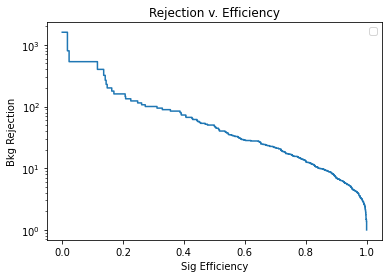

In [55]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
    plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency')
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [56]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model})
area_table

ROC curve


,mass_{H+},area
0,500GeV,0.929713
1,600GeV,0.929850
2,700GeV,0.951224
3,800GeV,0.951417
4,1000GeV,0.949014


In [57]:
print ('rejection vs efficiency')
area_table_rve = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model_rve})
area_table_rve

rejection vs efficiency


,mass_{H+},area
0,500GeV,auc_model_rve_500
1,600GeV,auc_model_rve_600
2,700GeV,auc_model_rve_700
3,800GeV,auc_model_rve_800
4,1000GeV,auc_model_rve_1000


In [58]:
#end of model

In [59]:
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

df_train = pd.concat([df_norm_bkg.iloc[::2],df_norm_sig.iloc[::2]])
df_test =  pd.concat([df_norm_bkg.iloc[1::2],df_norm_sig.iloc[1::2]])

#df_train = pd.concat([df_norm_bkg.iloc[[i%2==1 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==0 for i in range(len(df_norm_sig))]]])
#df_test =  pd.concat([df_norm_bkg.iloc[[i%2==0 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==1 for i in range(len(df_norm_sig))]]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
df_train

In [ ]:
df_test

In [ ]:
test_array = df_test[variable].reset_index(drop=True)
test_array["signal"] = 1

In [ ]:
test_array

In [ ]:
df_x_test = df_test[variable].reset_index(drop=True)
df_y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
df_y_test

In [ ]:
test_predict = model.predict(df_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print (auc_test)
plt.figure()
plt.hist(test_predict)
plt.show()

In [ ]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
### Beginning of DT ###
#from sklearn import tree


#n_bkg = round(4010*80/100)
#n_sig = round(5000*80/100)
#n_bkg = round(8026*80/100)
#n_sig = round(10000*80/100)


#df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
#df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

#df_train = sklearn.utils.shuffle(df_train)
#df_test = sklearn.utils.shuffle(df_test)

#x_train = df_train[variable].reset_index(drop=True)
#y_train = df_train["signal"].reset_index(drop=True)

#x_test = df_test[variable].reset_index(drop=True)
#y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
#end test predict for 50:50 test:train

In [ ]:
#Decision tree for lower level variables above - refer to DecisionTree-higherLevelVar for higher level DT

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#y_predict_tree = tree_model.predict(x_test)
y_predict_tree = tree_model.predict_proba(x_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)

In [ ]:
y_test

In [ ]:
plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)

In [ ]:
y_predict_gdc = GDC.predict_proba(x_test)[:,1]
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)

plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [ ]:
tree_2.fit(x_train,y_train)

In [ ]:
tree_2.score(x_test,y_test)

In [ ]:
#End of DT - Begin new model1 

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

In [ ]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

In [ ]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

In [ ]:
y_predict1 = model1.predict(x_test.values, batch_size=32)

In [ ]:
print (y_predict1)

plt.figure()
plt.hist(y_predict1)
plt.show()

In [ ]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predict1)

auc_model1 = auc(fpr_1, tpr_1)

In [ ]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###Stochastic Gradient Decent###
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)
#x_test["signal"] = 1

In [ ]:
y_test

In [ ]:
print(x_test.columns)
plt.hist(clf.decision_function(x_test[x_test.values == 1]),bins='auto')
#plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)


auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()